In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error

from sklearn import linear_model

import matplotlib.pyplot as plt
%matplotlib inline

import os

In [4]:
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# Importing dataset
df=pd.read_csv('hour.csv')

In [6]:
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [7]:
df.shape

(17379, 17)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [10]:
#To check if our dataset contains any null/NA value
#pd.isnull(df)
df.isnull().values.any()

False

In [11]:
#If we NA values exist, then to find total count of NA values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### NO missing values

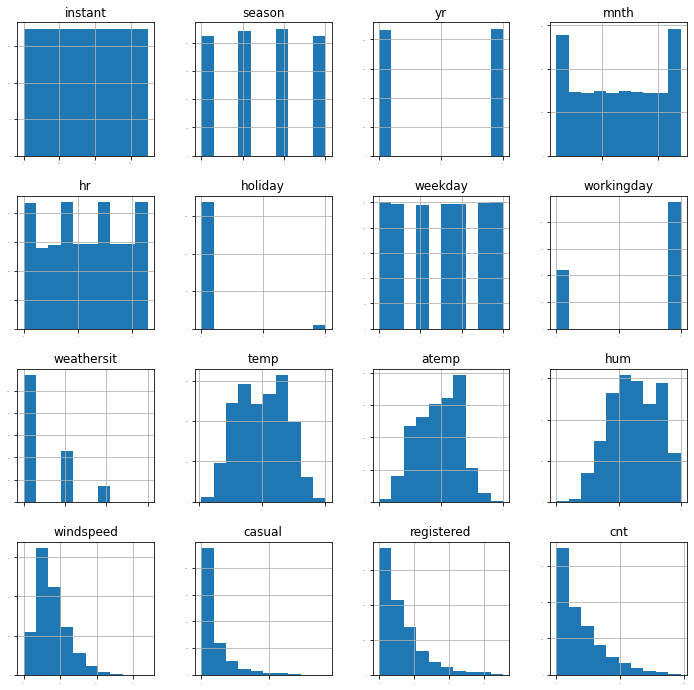

In [12]:
# to plot histograms (to check distribution of variables) of all the variables in a dataframe
df.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize =(12,12))
plt.show()

### Here, by observing distribution of season, yr, holiday, weekday, workingday, weatherlist variables, we find that its a binary or categorical feature (not a numeric feature as given in data description). We can confirm same by observing statistical description.

### converting season, yr, holiday, weekday, workingday, weatherlist variables to categorical type

In [13]:
#converting variables to categorical/qualitative type
df.season =df.season.astype('category')
df.yr =df.yr.astype('category')
df.holiday =df.holiday.astype('category')
df.weekday =df.weekday.astype('category')
df.workingday =df.workingday.astype('category')
df.weathersit =df.weathersit.astype('category')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     17379 non-null  int64   
 1   dteday      17379 non-null  object  
 2   season      17379 non-null  category
 3   yr          17379 non-null  category
 4   mnth        17379 non-null  int64   
 5   hr          17379 non-null  int64   
 6   holiday     17379 non-null  category
 7   weekday     17379 non-null  category
 8   workingday  17379 non-null  category
 9   weathersit  17379 non-null  category
 10  temp        17379 non-null  float64 
 11  atemp       17379 non-null  float64 
 12  hum         17379 non-null  float64 
 13  windspeed   17379 non-null  float64 
 14  casual      17379 non-null  int64   
 15  registered  17379 non-null  int64   
 16  cnt         17379 non-null  int64   
dtypes: category(6), float64(4), int64(6), object(1)
memory usage: 1.6+ MB


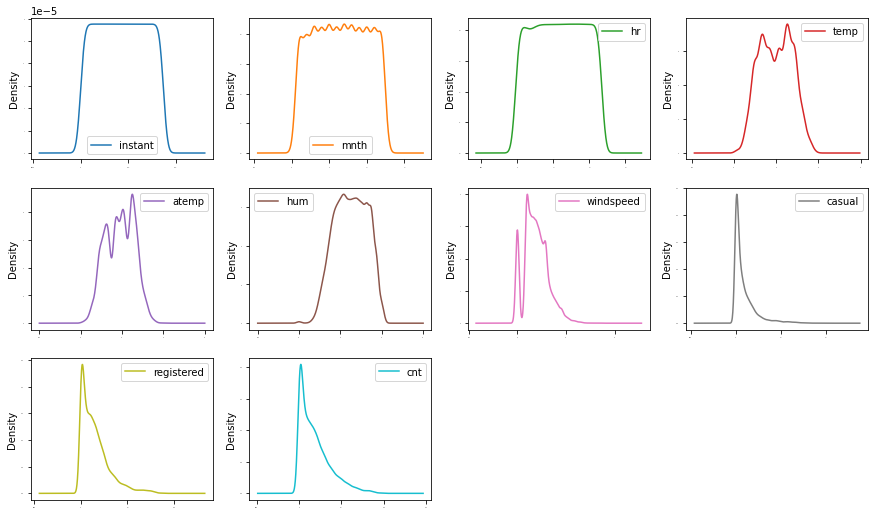

In [13]:
df.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=True, fontsize=1, figsize=(15,12))
plt.show()

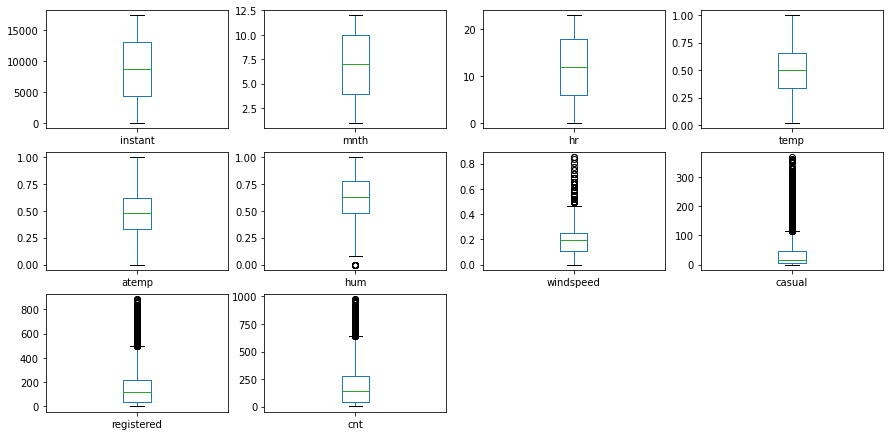

In [14]:
df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False,
        fontsize=10, figsize = (15, 10))
plt.show()

In [13]:
df.skew()

instant       0.000000
mnth         -0.009253
hr           -0.010680
temp         -0.006021
atemp        -0.090429
hum          -0.111287
windspeed     0.574905
casual        2.499237
registered    1.557904
cnt           1.277412
dtype: float64

### coloumns to be droped for model building
### instant is just a index, dteday we are predicting based on hours of day not on date, atemp as we have temp measured, casual & registered already counted as total count in cnt.
### therefore dropping above 5 features from df1

In [15]:
df1=df.drop(['instant','dteday','atemp','casual','registered'],axis=1)

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      17379 non-null  category
 1   yr          17379 non-null  category
 2   mnth        17379 non-null  int64   
 3   hr          17379 non-null  int64   
 4   holiday     17379 non-null  category
 5   weekday     17379 non-null  category
 6   workingday  17379 non-null  category
 7   weathersit  17379 non-null  category
 8   temp        17379 non-null  float64 
 9   hum         17379 non-null  float64 
 10  windspeed   17379 non-null  float64 
 11  cnt         17379 non-null  int64   
dtypes: category(6), float64(3), int64(3)
memory usage: 917.7 KB


<AxesSubplot:xlabel='season', ylabel='cnt'>

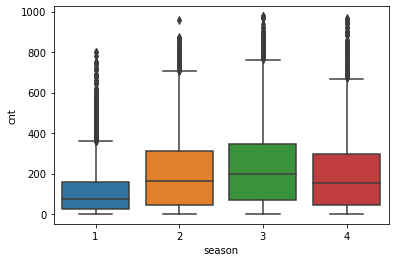

In [18]:
sns.boxplot(y = df1.cnt, x = df1.season)

<AxesSubplot:xlabel='yr', ylabel='cnt'>

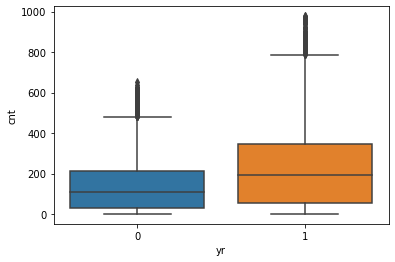

In [19]:
sns.boxplot(y = df1.cnt, x = df1.yr)

<AxesSubplot:xlabel='holiday', ylabel='cnt'>

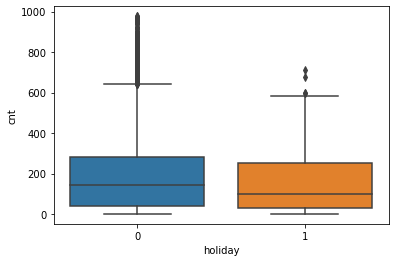

In [20]:
sns.boxplot(y = df1.cnt, x = df1.holiday)

<AxesSubplot:xlabel='weekday', ylabel='cnt'>

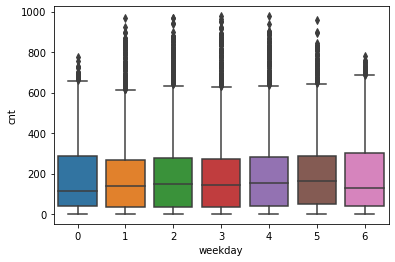

In [21]:
sns.boxplot(y = df1.cnt, x = df1.weekday)

<AxesSubplot:xlabel='workingday', ylabel='cnt'>

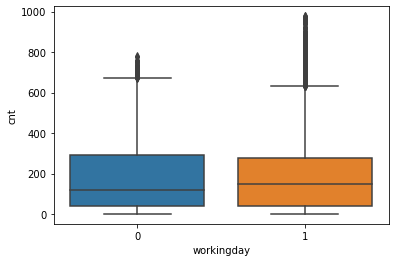

In [22]:
sns.boxplot(y = df1.cnt, x = df1.workingday)

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

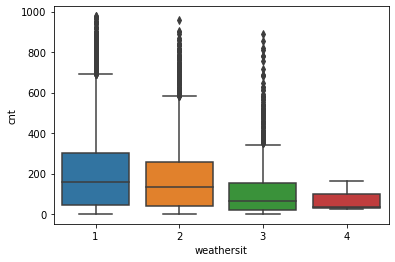

In [23]:
sns.boxplot(y = df1.cnt, x = df1.weathersit)

### here we will encode season, yr and weatherlist feture where we observe change in median.
### rest all we drop from df for model building(holiday, weekday, workingday)

In [17]:
df2=df1.drop(['holiday','weekday','workingday'],axis=1)

In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      17379 non-null  category
 1   yr          17379 non-null  category
 2   mnth        17379 non-null  int64   
 3   hr          17379 non-null  int64   
 4   weathersit  17379 non-null  category
 5   temp        17379 non-null  float64 
 6   hum         17379 non-null  float64 
 7   windspeed   17379 non-null  float64 
 8   cnt         17379 non-null  int64   
dtypes: category(3), float64(3), int64(3)
memory usage: 866.2 KB


In [19]:
df2.skew()

mnth        -0.009253
hr          -0.010680
temp        -0.006021
hum         -0.111287
windspeed    0.574905
cnt          1.277412
dtype: float64

In [20]:
df3=df2

In [21]:


#performing the root transformation using numpy
log_cnt = np.log(abs(df3['cnt']))
#log_cnt = np.cbrt(df2['cnt'])

In [22]:
df3['cnt']=log_cnt

In [23]:
df3.skew()

mnth        -0.009253
hr          -0.010680
temp        -0.006021
hum         -0.111287
windspeed    0.574905
cnt         -0.936182
dtype: float64

### df2 without transform of cnt
### df3 with cnt transformation

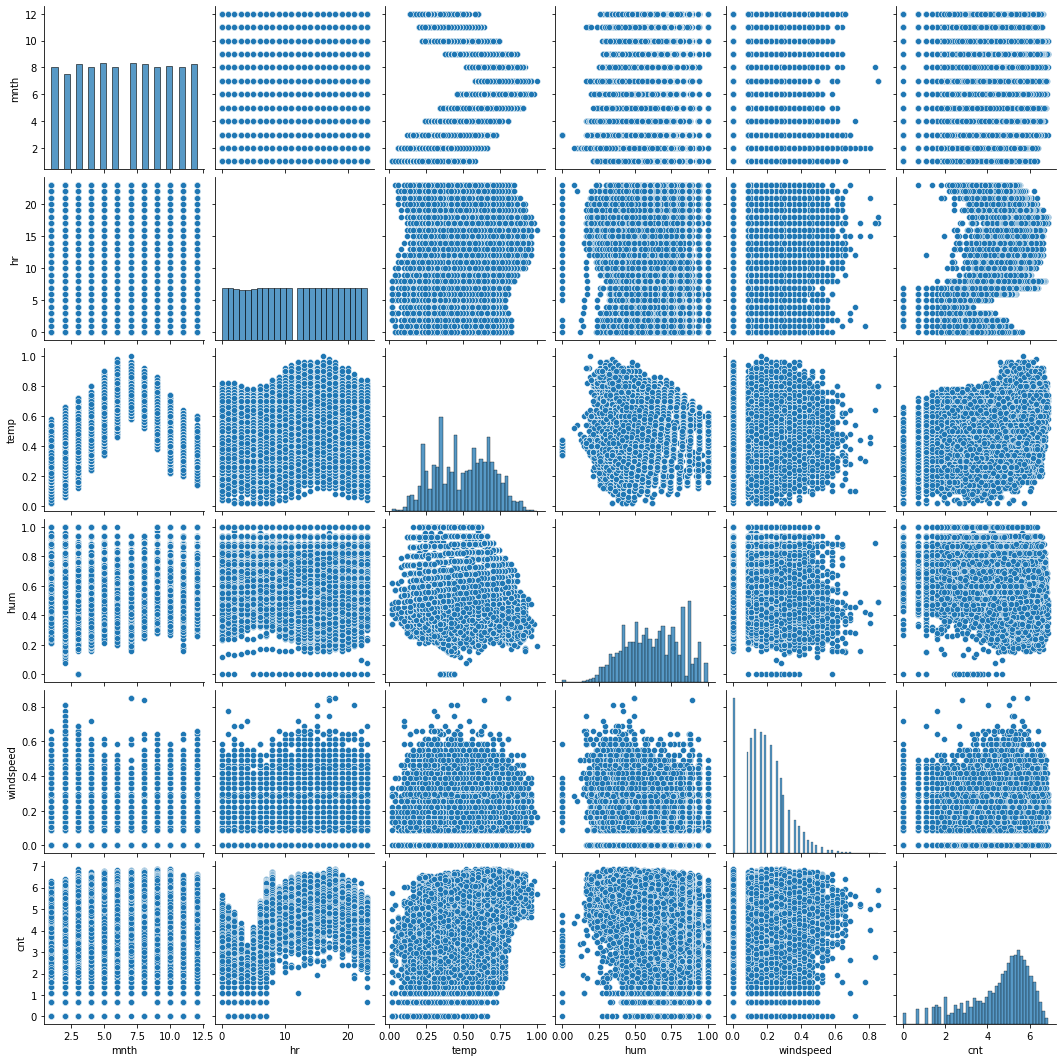

In [31]:
# Scatter plot matrix using seaborn library
sns.pairplot(df2)
plt.show()

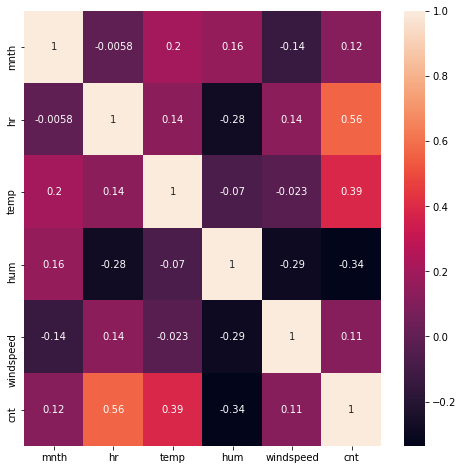

In [32]:
corr = df2.corr()
plt.figure(figsize = (8,8))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values,annot=True)
plt.show()

### Negligable correlation features with target
### windspeed, month.

In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      17379 non-null  category
 1   yr          17379 non-null  category
 2   mnth        17379 non-null  int64   
 3   hr          17379 non-null  int64   
 4   weathersit  17379 non-null  category
 5   temp        17379 non-null  float64 
 6   hum         17379 non-null  float64 
 7   windspeed   17379 non-null  float64 
 8   cnt         17379 non-null  float64 
dtypes: category(3), float64(4), int64(2)
memory usage: 866.2 KB


In [24]:
#from sklearn.model_selection import train_test_split
seed = 10
test_size = 0.25
trainingSet, testingSet = train_test_split(df2, test_size = test_size, random_state = seed)

In [25]:
trainingSet.shape , testingSet.shape , df2.shape

((13034, 9), (4345, 9), (17379, 9))

In [26]:
import statsmodels.formula.api as smf

In [27]:
#A model including all the independent variables

model_1 = smf.ols(formula = """cnt ~ season + yr + mnth + hr  
                           + weathersit + temp + hum + windspeed""", data = trainingSet)
result_1 = model_1.fit()
print(result_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     1048.
Date:                Sat, 21 Aug 2021   Prob (F-statistic):               0.00
Time:                        11:42:31   Log-Likelihood:                -19178.
No. Observations:               13034   AIC:                         3.838e+04
Df Residuals:                   13021   BIC:                         3.848e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.5200      0.058     

In [28]:
#A model excluding season & weatherlist variables

model_2 = smf.ols(formula = """cnt ~ yr + season + hr  
                           + weathersit + temp + hum + windspeed""", data = trainingSet)
result_2 = model_2.fit()
print(result_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     1143.
Date:                Sat, 21 Aug 2021   Prob (F-statistic):               0.00
Time:                        11:42:31   Log-Likelihood:                -19178.
No. Observations:               13034   AIC:                         3.838e+04
Df Residuals:                   13022   BIC:                         3.847e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.5166      0.057     

In [29]:
#A model excluding season & weatherlist variables

model_3 = smf.ols(formula = """cnt ~ yr + season + hr + temp + hum + windspeed""", data = trainingSet)
result_3 = model_3.fit()
print(result_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     1541.
Date:                Sat, 21 Aug 2021   Prob (F-statistic):               0.00
Time:                        11:42:31   Log-Likelihood:                -19241.
No. Observations:               13034   AIC:                         3.850e+04
Df Residuals:                   13025   BIC:                         3.857e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.5944      0.055     46.786      

In [30]:
#A model excluding season & weatherlist variables

model_4 = smf.ols(formula = """cnt ~ yr+ season + hr + temp + hum""", data = trainingSet)
result_4 = model_4.fit()
print(result_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     1760.
Date:                Sat, 21 Aug 2021   Prob (F-statistic):               0.00
Time:                        11:42:31   Log-Likelihood:                -19243.
No. Observations:               13034   AIC:                         3.850e+04
Df Residuals:                   13026   BIC:                         3.856e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.6484      0.050     52.856      

In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      17379 non-null  category
 1   yr          17379 non-null  category
 2   mnth        17379 non-null  int64   
 3   hr          17379 non-null  int64   
 4   weathersit  17379 non-null  category
 5   temp        17379 non-null  float64 
 6   hum         17379 non-null  float64 
 7   windspeed   17379 non-null  float64 
 8   cnt         17379 non-null  float64 
dtypes: category(3), float64(4), int64(2)
memory usage: 866.2 KB


In [32]:
#A model including season + hr + yr + temp + hum variables

model_11 = smf.ols(formula = """cnt ~ season + hr + yr + temp + hum""", data = trainingSet)
result_11 = model_11.fit()
print(result_11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     1760.
Date:                Sat, 21 Aug 2021   Prob (F-statistic):               0.00
Time:                        11:42:31   Log-Likelihood:                -19243.
No. Observations:               13034   AIC:                         3.850e+04
Df Residuals:                   13026   BIC:                         3.856e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.6484      0.050     52.856      

In [33]:
#Calculating trainingset MSE/RMSE for model_2
y_hat = result_11.predict(trainingSet[['season', 'hr', 'yr' , 'temp' , 'hum']])
train_MSE = np.mean(((trainingSet.cnt - y_hat)**2))
print("Training RMSE = ", np.sqrt(train_MSE))

Training RMSE =  1.0591434047827122


In [34]:
#USing inbuilt function
print("MSE = ", mean_squared_error(trainingSet.cnt, y_hat))
print("Training RMSE = ", np.sqrt(mean_squared_error(trainingSet.cnt, y_hat)))
print(result_11.mse_resid)  # MSE of residues
print("R_squared = ",result_11.rsquared)   # R_squared value
print("Adjusted R_squared = ",result_11.rsquared_adj)  # Adjusted R_Squared

MSE =  1.1217847518947093
Training RMSE =  1.0591434047827089
1.1224737030704468
R_squared =  0.4861160053741366
Adjusted R_squared =  0.48583985091671444


In [35]:
#TestSet MSE[['RM', 'PTRATIO' , 'B' ,'LSTAT']]
yp_test = result_11.predict(testingSet[['season', 'hr', 'yr' , 'temp' , 'hum']])
test_MSE = np.mean(((testingSet.cnt - yp_test)**2))
print("Testing RMSE is =", np.sqrt(test_MSE))

Testing RMSE is = 1.0928639771906636


In [36]:
testingSet

,season,yr,mnth,hr,weathersit,temp,hum,windspeed,cnt
6557,4,0,10,19,1,0.58,0.56,0.1343,5.924256
11737,2,1,5,6,2,0.56,0.88,0.1045,4.836282
4952,3,0,7,6,1,0.72,0.70,0.2985,3.178054
2853,2,0,5,19,1,0.68,0.57,0.3582,5.899897
3697,2,0,6,23,1,0.68,0.79,0.1045,4.499810
...,...,...,...,...,...,...,...,...,...
8861,1,1,1,1,2,0.22,0.93,0.1045,1.609438
7701,4,0,11,12,3,0.40,1.00,0.0896,3.044522
5093,3,0,8,3,1,0.64,0.78,0.0896,1.791759
16125,4,1,11,15,1,0.46,0.36,0.2239,5.874931


In [37]:
yp_test

6557     5.730751
11737    4.012070
4952     4.065295
2853     5.642676
3697     5.720227
           ...   
8861     2.378973
7701     3.930910
5093     3.444936
16125    5.740137
4318     5.116278
Length: 4345, dtype: float64

In [38]:
#Calculating VIF scores
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

y, X = dmatrices('cnt ~ season + hr + yr + temp + hum', data = trainingSet, return_type="dataframe")

# For each Xi, calculate VIF
vif = [variance_inflation_factor(X.values, i) for i in range(1, X.shape[1])]
vif

[2.4176876084804935,
 3.991468421300248,
 1.8051635406499544,
 1.0128589988699737,
 1.1192299198246842,
 2.7770981698789994,
 1.1373979675329466]

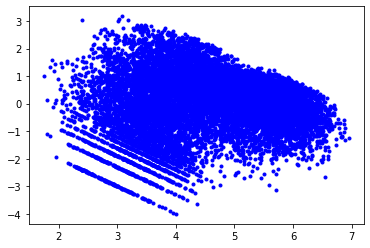

In [39]:
#Residual Plots
res1 = trainingSet.cnt - y_hat
plt.plot(  y_hat, res1,  'b.')

C:\Users\mahesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


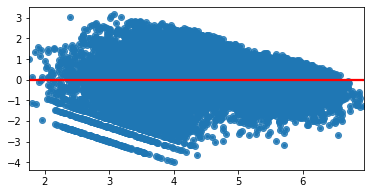

In [40]:
#Diagnosis of Model
#Checking Linearity Assusmption and Constant Variance of Residual Terms

pred_val = result_11.fittedvalues.copy()
true_val = trainingSet['cnt'].values.copy()
residual = true_val - pred_val
fig, ax = plt.subplots(figsize=(6,3))
_ = ax.scatter(pred_val , residual, s = 5)
sns.regplot(pred_val, residual, order = 1, ci=None, line_kws={'color':'r'})
plt.show()

0.9885775665499802

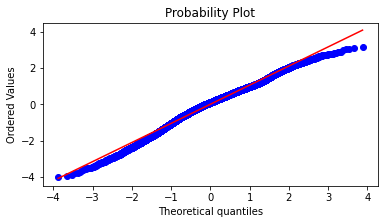

In [41]:
#Checming Normality Condition
import scipy as sp
fig, ax = plt.subplots(figsize=(6,3))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)
r**2

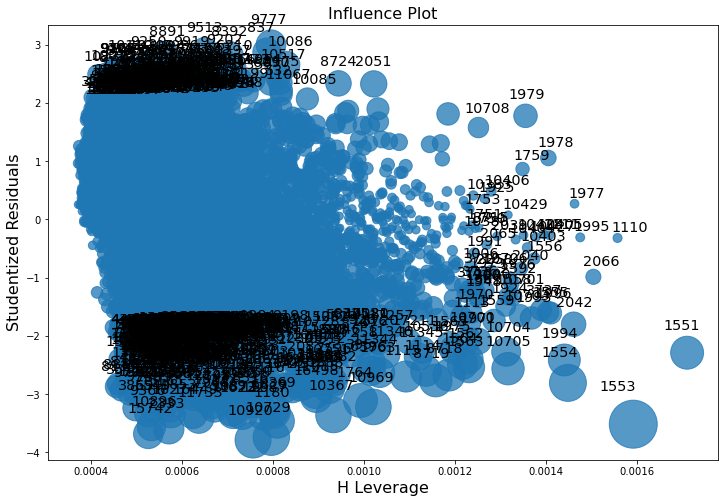

In [42]:
import statsmodels.api as sm
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(result_11, ax=ax, criterion="cooks")

### next steps used to remove outliers and influential points present and rebuild model

## removing influetial observations from model 11 result_11 considering 'season', 'hr', 'yr' , 'temp' , 'hum'

In [43]:
influence = result_11.get_influence()
pd.Series(influence.hat_matrix_diag).describe()

count    13034.000000
mean         0.000614
std          0.000155
min          0.000372
25%          0.000504
50%          0.000586
75%          0.000685
max          0.001711
dtype: float64

In [44]:
inf_sum = influence.summary_frame()

print(inf_sum.head())

       dfb_Intercept  dfb_season[T.2]  dfb_season[T.3]  dfb_season[T.4]  \
3406        0.000389        -0.000143         0.000475         0.000225   
7563       -0.003849        -0.000975        -0.001147         0.003073   
12823       0.001193        -0.001641         0.002657        -0.000317   
14190      -0.004075         0.001999         0.009293         0.000518   
9222       -0.009794         0.016001         0.012128         0.019222   

       dfb_yr[T.1]    dfb_hr  dfb_temp   dfb_hum       cooks_d  \
3406      0.000492 -0.000423 -0.000608 -0.000083  2.170553e-07   
7563     -0.002814  0.003729  0.001128  0.004380  9.917461e-06   
12823     0.005075 -0.001861  0.003493 -0.005430  2.711927e-05   
14190     0.008548  0.002003 -0.003976  0.006206  4.437028e-05   
9222     -0.014402  0.013025  0.001568 -0.005832  1.662107e-04   

       standard_resid  hat_diag  dffits_internal  student_resid    dffits  
3406        -0.052495  0.000630        -0.001318      -0.052493 -0.001318  


In [45]:
student_resid = influence.resid_studentized_external
(cooks, p) = influence.cooks_distance
(dffits, p) = influence.dffits
leverage = influence.hat_matrix_diag



Leverage vs. Studentized Residuals


C:\Users\mahesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Studentized Residuals')

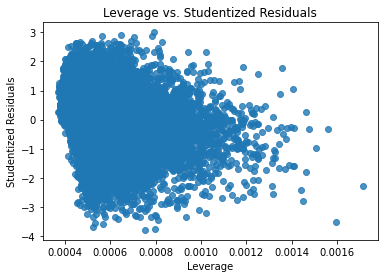

In [46]:
print ('\n')
print ('Leverage vs. Studentized Residuals')
sns.regplot(leverage, result_11.resid_pearson,  fit_reg=False)
plt.title('Leverage vs. Studentized Residuals')
plt.xlabel('Leverage')
plt.ylabel('Studentized Residuals')

In [47]:
from statsmodels.formula.api import ols

MEDVres = pd.concat([df2, inf_sum], axis = 1)
MEDVres=MEDVres.rename(columns={'hat_diag': 'leverage'})
MEDVres.head()

,season,yr,mnth,hr,weathersit,temp,hum,windspeed,cnt,dfb_Intercept,...,dfb_yr[T.1],dfb_hr,dfb_temp,dfb_hum,cooks_d,standard_resid,leverage,dffits_internal,student_resid,dffits
0,1,0,1,0,1,0.24,0.81,0.0,2.772589,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0,1,1,1,0.22,0.80,0.0,3.688879,0.013530,...,-0.012235,-0.016041,-0.002073,0.008231,1.646022e-04,1.457637,0.000619,0.036288,1.457700,0.036290
2,1,0,1,2,1,0.22,0.80,0.0,3.465736,0.010091,...,-0.009612,-0.011139,-0.001925,0.006885,9.836297e-05,1.152909,0.000592,0.028052,1.152923,0.028052
3,1,0,1,3,1,0.24,0.75,0.0,2.564949,0.000849,...,-0.000782,-0.000838,-0.000066,0.000371,5.599579e-07,0.091192,0.000538,0.002117,0.091188,0.002116
4,1,0,1,4,1,0.24,0.75,0.0,0.000000,-0.021300,...,0.020659,0.019024,0.002346,-0.010665,3.789859e-04,-2.424434,0.000516,-0.055063,-2.424888,-0.055073


In [48]:
#studentized residuals for identifying outliers
#requested studentized residuals call them r
#studentized residuals that exceed +2 or -2 are concerning
#studentized residuals that exceed +3 or -3 are extremely concerning

r = MEDVres.student_resid
print ('-'*30 + ' studentized residual ' + '-'*30)
print (r.describe())
print ('\n')

r_sort = MEDVres.sort_values(by = 'student_resid')
print ('-'*30 + ' top 5 most negative residuals ' + '-'*30)
print (r_sort.head())
print ('\n')

print ('-'*30 + ' top 5 most positive residuals ' + '-'*30)
print (r_sort.tail())

------------------------------ studentized residual ------------------------------
count    13034.000000
mean        -0.000036
std          1.000127
min         -3.786379
25%         -0.586098
50%          0.098197
75%          0.661023
max          3.001107
Name: student_resid, dtype: float64


------------------------------ top 5 most negative residuals ------------------------------
      season yr  mnth  hr weathersit  temp   hum  windspeed  cnt  \
10920      2  1     4   4          1  0.38  0.43     0.2836  0.0   
10729      2  1     3   4          1  0.36  0.43     0.2985  0.0   
15742      4  1    10   3          1  0.44  0.77     0.1343  0.0   
2333       2  0     4   3          2  0.58  0.56     0.1343  0.0   
10896      2  1     4   4          1  0.42  0.67     0.0896  0.0   

       dfb_Intercept  ...  dfb_yr[T.1]    dfb_hr  dfb_temp   dfb_hum  \
10920      -0.057982  ...    -0.032352  0.036605  0.047279  0.049078   
10729      -0.060020  ...    -0.032323  0.035090  0.052363

In [49]:
#Print all MEDV values where the studentized residuals exceed 2
print (MEDVres[abs(r) > 2])
#MEDVres[abs(r) > 2]

      season yr  mnth  hr weathersit  temp   hum  windspeed       cnt  \
4          1  0     1   4          1  0.24  0.75     0.0000  0.000000   
5          1  0     1   5          2  0.24  0.75     0.0896  0.000000   
29         1  0     1   6          3  0.42  0.77     0.2985  0.693147   
45         1  0     1  22          1  0.24  0.44     0.2985  2.197225   
49         1  0     1   4          1  0.16  0.47     0.3881  0.000000   
...      ... ..   ...  ..        ...   ...   ...        ...       ...   
17257      1  1    12  22          3  0.24  0.93     0.4478  2.397895   
17258      1  1    12  23          3  0.26  0.87     0.2985  2.302585   
17262      1  1    12   3          2  0.24  0.87     0.2239  0.000000   
17336      1  1    12   5          2  0.26  0.48     0.2985  0.693147   
17358      1  1    12   3          1  0.16  0.59     0.1045  0.000000   

       dfb_Intercept  ...  dfb_yr[T.1]    dfb_hr  dfb_temp   dfb_hum  \
4          -0.021300  ...     0.020659  0.019024  0

In [50]:
df2.shape

(17379, 9)

In [51]:
((2*1)+2)/17379

0.0002301628402094482

In [52]:
#Identify high leverage
#point with leverage = (2k+2)/n 
#k = number of predictors (1)
#n = number of observations (17379)
((2*1)+2)/17379 #= 0.0002301628402094482 any number higher than this is high leverage
l = MEDVres.leverage

print ('-'*30 + ' Leverage ' + '-'*30)
print (l.describe())
print ('\n')

l_sort = MEDVres.sort_values(by = 'leverage', ascending = False)
print ('-'*30 + ' top 5 highest leverage data points ' + '-'*30)
print (l_sort.head())

------------------------------ Leverage ------------------------------
count    13034.000000
mean         0.000614
std          0.000155
min          0.000372
25%          0.000504
50%          0.000586
75%          0.000685
max          0.001711
Name: leverage, dtype: float64


------------------------------ top 5 highest leverage data points ------------------------------
     season yr  mnth  hr weathersit  temp   hum  windspeed       cnt  \
1551      1  0     3   0          3  0.34  0.00     0.2537  1.098612   
1553      1  0     3   2          3  0.34  0.00     0.2537  0.000000   
1110      1  0     2   0          1  0.48  0.12     0.4925  3.367296   
2066      2  0     3  23          3  0.26  1.00     0.1642  3.295837   
1995      2  0     3   0          1  0.26  0.28     0.3284  2.772589   

      dfb_Intercept  ...  dfb_yr[T.1]    dfb_hr  dfb_temp   dfb_hum   cooks_d  \
1551      -0.079362  ...     0.027781  0.053604 -0.006316  0.073866  0.001120   
1553      -0.118205  ...    

In [53]:
#point with leverage = (2k+2)/n = 0.0002301628402094482
#Print all MEDV values where the leverage exceeds 0.0002301628402094482
print (MEDVres[abs(l) > ((2*1)+2)/17379])

      season yr  mnth  hr weathersit  temp   hum  windspeed       cnt  \
1          1  0     1   1          1  0.22  0.80     0.0000  3.688879   
2          1  0     1   2          1  0.22  0.80     0.0000  3.465736   
3          1  0     1   3          1  0.24  0.75     0.0000  2.564949   
4          1  0     1   4          1  0.24  0.75     0.0000  0.000000   
5          1  0     1   5          2  0.24  0.75     0.0896  0.000000   
...      ... ..   ...  ..        ...   ...   ...        ...       ...   
17369      1  1    12  14          2  0.28  0.45     0.2239  5.509388   
17370      1  1    12  15          2  0.28  0.45     0.1343  5.752573   
17371      1  1    12  16          2  0.26  0.48     0.1940  5.365976   
17374      1  1    12  19          2  0.26  0.60     0.1642  4.779123   
17376      1  1    12  21          1  0.26  0.60     0.1642  4.499810   

       dfb_Intercept  ...  dfb_yr[T.1]    dfb_hr  dfb_temp   dfb_hum  \
1           0.013530  ...    -0.012235 -0.016041 -0

In [54]:
#large residual and large leverage = INFLUENTIAL
#Print values that are both outliers and influential
outlier=pd.DataFrame((MEDVres[abs(r) > 2]))
lev= pd.DataFrame((MEDVres[abs(l) > ((2*1)+2)/17379]))
#print(lev.index.tolist())

In [55]:
Influential1=pd.merge(outlier,lev, left_index=True, right_index=True, how='outer')
#print(Influential1)

In [56]:
Influential2=pd.merge(outlier,lev, left_index=True, right_index=True)
index1=Influential2.index.tolist()
print(index1)

[4, 5, 29, 45, 49, 71, 95, 118, 141, 191, 208, 210, 212, 239, 303, 304, 329, 352, 353, 354, 377, 395, 415, 434, 439, 458, 459, 526, 527, 528, 532, 555, 574, 598, 602, 666, 672, 696, 714, 715, 719, 738, 739, 760, 761, 765, 810, 811, 837, 861, 876, 903, 907, 930, 950, 994, 995, 996, 1019, 1041, 1042, 1046, 1070, 1090, 1114, 1115, 1116, 1139, 1161, 1162, 1180, 1183, 1201, 1206, 1317, 1341, 1345, 1365, 1386, 1388, 1389, 1393, 1412, 1413, 1417, 1437, 1482, 1484, 1487, 1505, 1511, 1535, 1551, 1553, 1554, 1562, 1563, 1564, 1565, 1580, 1625, 1644, 1645, 1692, 1696, 1715, 1720, 1763, 1764, 1832, 1834, 1880, 1881, 1971, 1975, 1994, 2023, 2046, 2051, 2143, 2162, 2191, 2195, 2215, 2219, 2239, 2333, 2355, 2381, 2455, 2501, 2525, 2573, 2698, 2810, 2818, 2837, 2842, 2861, 2910, 2914, 3029, 3034, 3058, 3178, 3202, 3225, 3226, 3250, 3322, 3341, 3510, 3532, 3534, 3557, 3558, 3581, 3631, 3701, 3725, 3726, 3750, 3845, 3869, 3870, 3892, 3893, 3913, 3922, 3989, 3990, 3991, 4018, 4060, 4157, 4181, 4304, 4327

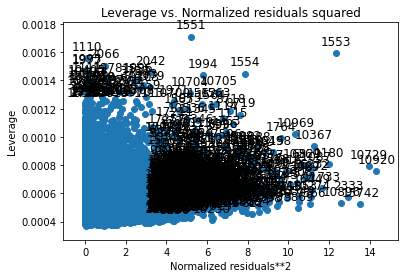

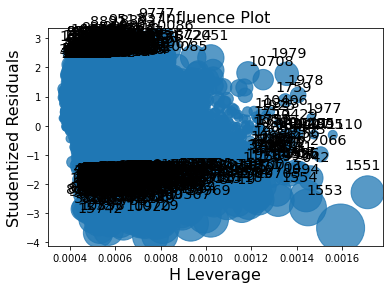

In [57]:
#Plot influential observations
#Use residual squared to restrict the graph but preserve the relative position of observations

from statsmodels.graphics.regressionplots import *
plot_leverage_resid2(result_11)
plt.show()

# plt.scatter(MEDVres.student_resid ** 2, MEDVres.leverage)
# for i, state in enumerate(boston_df.MEDV):
#     plt.annotate(state, [(MEDVres.student_resid ** 2)[i],  MEDVres.leverage[i]])
# plt.xlabel("Normalized Residuals**2")
# plt.ylabel("Leverage")
# plt.show()

influence_plot(result_11)
plt.show()

In [58]:
#GENERAL MEASURE OF INFLUENCE
#Identify influential observations with DFFITS
#conventional cut-off point for DFITS is 2*sqrt(k/n)
import math
dffits_outlier=MEDVres[abs(MEDVres.dffits) > 2 * math.sqrt(1 / 17379)]

In [59]:
index2=dffits_outlier.index.tolist()
print(index2)

[1, 2, 4, 5, 6, 8, 18, 19, 20, 21, 22, 23, 27, 29, 31, 44, 45, 47, 49, 50, 52, 53, 54, 67, 69, 70, 71, 72, 73, 74, 75, 77, 81, 86, 91, 94, 95, 96, 98, 108, 112, 114, 118, 120, 123, 131, 132, 141, 142, 143, 144, 154, 158, 159, 160, 161, 164, 167, 173, 174, 182, 183, 184, 185, 188, 191, 192, 193, 197, 205, 206, 207, 208, 210, 211, 212, 213, 214, 226, 227, 230, 232, 234, 235, 236, 238, 239, 240, 247, 248, 249, 252, 253, 257, 258, 261, 262, 270, 275, 276, 279, 280, 281, 282, 284, 286, 298, 299, 300, 302, 303, 304, 307, 309, 322, 328, 329, 330, 335, 345, 347, 348, 352, 353, 354, 355, 359, 360, 369, 371, 375, 377, 378, 382, 383, 384, 385, 393, 394, 395, 396, 401, 402, 406, 407, 413, 414, 415, 416, 417, 418, 424, 428, 429, 432, 433, 434, 436, 438, 439, 440, 448, 449, 454, 457, 458, 459, 460, 464, 472, 476, 478, 483, 487, 488, 489, 490, 493, 501, 502, 503, 504, 506, 508, 512, 513, 514, 515, 521, 522, 523, 524, 526, 527, 528, 531, 532, 533, 541, 546, 547, 550, 553, 554, 555, 556, 559, 564, 565,

In [60]:
#Cook's D of more than 3 times the mean is a possible outlier
#MEDVres.loc[:,"cooks_d"].mean()
cutoff=(MEDVres.loc[:,"cooks_d"].mean())*3
outlier2=pd.DataFrame((MEDVres[abs(MEDVres.cooks_d) > cutoff]))
index3=outlier2.index.tolist()
print(index3)

[4, 5, 29, 45, 49, 53, 71, 75, 91, 95, 96, 114, 118, 141, 160, 184, 191, 207, 208, 210, 212, 239, 257, 279, 300, 303, 304, 329, 352, 353, 354, 371, 375, 377, 395, 396, 414, 415, 416, 433, 434, 439, 458, 459, 508, 524, 526, 527, 528, 531, 532, 554, 555, 574, 598, 602, 623, 666, 668, 672, 696, 714, 715, 719, 737, 738, 739, 760, 761, 765, 766, 810, 811, 836, 837, 861, 876, 883, 903, 907, 930, 950, 991, 994, 995, 996, 997, 1015, 1018, 1019, 1023, 1038, 1041, 1042, 1046, 1070, 1090, 1107, 1109, 1113, 1114, 1115, 1116, 1139, 1159, 1161, 1162, 1180, 1183, 1198, 1201, 1206, 1248, 1272, 1317, 1341, 1345, 1365, 1384, 1386, 1387, 1388, 1389, 1393, 1412, 1413, 1417, 1437, 1461, 1471, 1476, 1477, 1478, 1482, 1484, 1487, 1502, 1505, 1511, 1535, 1536, 1550, 1551, 1553, 1554, 1555, 1558, 1559, 1561, 1562, 1563, 1564, 1565, 1568, 1576, 1580, 1625, 1644, 1645, 1688, 1692, 1695, 1696, 1697, 1715, 1720, 1743, 1762, 1763, 1764, 1832, 1834, 1856, 1857, 1860, 1862, 1880, 1881, 1884, 1885, 1886, 1900, 1904, 1

### removing outlier & influencial observatins calculated with DFFITS and Cook's D.

In [61]:
indices=[index1,index2,index3]
print(indices)

[[4, 5, 29, 45, 49, 71, 95, 118, 141, 191, 208, 210, 212, 239, 303, 304, 329, 352, 353, 354, 377, 395, 415, 434, 439, 458, 459, 526, 527, 528, 532, 555, 574, 598, 602, 666, 672, 696, 714, 715, 719, 738, 739, 760, 761, 765, 810, 811, 837, 861, 876, 903, 907, 930, 950, 994, 995, 996, 1019, 1041, 1042, 1046, 1070, 1090, 1114, 1115, 1116, 1139, 1161, 1162, 1180, 1183, 1201, 1206, 1317, 1341, 1345, 1365, 1386, 1388, 1389, 1393, 1412, 1413, 1417, 1437, 1482, 1484, 1487, 1505, 1511, 1535, 1551, 1553, 1554, 1562, 1563, 1564, 1565, 1580, 1625, 1644, 1645, 1692, 1696, 1715, 1720, 1763, 1764, 1832, 1834, 1880, 1881, 1971, 1975, 1994, 2023, 2046, 2051, 2143, 2162, 2191, 2195, 2215, 2219, 2239, 2333, 2355, 2381, 2455, 2501, 2525, 2573, 2698, 2810, 2818, 2837, 2842, 2861, 2910, 2914, 3029, 3034, 3058, 3178, 3202, 3225, 3226, 3250, 3322, 3341, 3510, 3532, 3534, 3557, 3558, 3581, 3631, 3701, 3725, 3726, 3750, 3845, 3869, 3870, 3892, 3893, 3913, 3922, 3989, 3990, 3991, 4018, 4060, 4157, 4181, 4304, 432

In [62]:
df_rem_obs_tot=df2.drop([4, 5, 29, 45, 49, 71, 95, 118, 141, 191, 208, 210, 212, 239, 303, 304, 329, 352, 353, 354, 377, 395, 415, 434, 439, 458, 459, 526, 527, 528, 532, 555, 574, 598, 602, 666, 672, 696, 714, 715, 719, 738, 739, 760, 761, 765, 810, 811, 837, 861, 876, 903, 907, 930, 950, 994, 995, 996, 1019, 1041, 1042, 1046, 1070, 1090, 1114, 1115, 1116, 1139, 1161, 1162, 1180, 1183, 1201, 1206, 1317, 1341, 1345, 1365, 1386, 1388, 1389, 1393, 1412, 1413, 1417, 1437, 1482, 1484, 1487, 1505, 1511, 1535, 1551, 1553, 1554, 1562, 1563, 1564, 1565, 1580, 1625, 1644, 1645, 1692, 1696, 1715, 1720, 1763, 1764, 1832, 1834, 1880, 1881, 1971, 1975, 1994, 2023, 2046, 2051, 2143, 2162, 2191, 2195, 2215, 2219, 2239, 2333, 2355, 2381, 2455, 2501, 2525, 2573, 2698, 2810, 2818, 2837, 2842, 2861, 2910, 2914, 3029, 3034, 3058, 3178, 3202, 3225, 3226, 3250, 3322, 3341, 3510, 3532, 3534, 3557, 3558, 3581, 3631, 3701, 3725, 3726, 3750, 3845, 3869, 3870, 3892, 3893, 3913, 3922, 3989, 3990, 3991, 4018, 4060, 4157, 4181, 4304, 4327, 4540, 4541, 4594, 4662, 4685, 4686, 4710, 4829, 4876, 4878, 4901, 4902, 4997, 5046, 5069, 5165, 5189, 5213, 5262, 5429, 5501, 5549, 5554, 5573, 5622, 5657, 5733, 5757, 5847, 5852, 5871, 5876, 5894, 5895, 5918, 5994, 6012, 6017, 6018, 6041, 6090, 6162, 6185, 6210, 6230, 6233, 6234, 6303, 6373, 6374, 6396, 6540, 6566, 6685, 6708, 6709, 6829, 6853, 6877, 6878, 6899, 6974, 7000, 7001, 7043, 7044, 7117, 7168, 7169, 7211, 7212, 7217, 7240, 7265, 7286, 7331, 7336, 7337, 7361, 7384, 7385, 7408, 7409, 7525, 7573, 7596, 7622, 7646, 7673, 7716, 7741, 7759, 7760, 7790, 7832, 7840, 7859, 7883, 7887, 7908, 7912, 7931, 7936, 8003, 8008, 8026, 8027, 8032, 8052, 8053, 8069, 8080, 8100, 8124, 8175, 8199, 8219, 8224, 8243, 8248, 8268, 8316, 8344, 8363, 8364, 8388, 8391, 8392, 8416, 8485, 8506, 8581, 8605, 8606, 8626, 8668, 8672, 8673, 8695, 8700, 8718, 8719, 8720, 8724, 8748, 8772, 8817, 8818, 8839, 8844, 8866, 8887, 8890, 8891, 8892, 8909, 8911, 8915, 8935, 9028, 9052, 9053, 9058, 9078, 9082, 9106, 9126, 9128, 9173, 9174, 9178, 9201, 9202, 9221, 9225, 9226, 9249, 9250, 9337, 9365, 9366, 9387, 9394, 9413, 9418, 9438, 9512, 9513, 9514, 9532, 9556, 9560, 9561, 9581, 9584, 9585, 9605, 9653, 9655, 9676, 9681, 9699, 9700, 9701, 9704, 9705, 9728, 9748, 9749, 9752, 9772, 9773, 9776, 9777, 9798, 9821, 9867, 9870, 9871, 9891, 9894, 9919, 9939, 9943, 9963, 9989, 10011, 10014, 10015, 10033, 10034, 10058, 10061, 10085, 10086, 10106, 10110, 10130, 10131, 10155, 10173, 10177, 10178, 10182, 10201, 10205, 10206, 10225, 10226, 10229, 10230, 10249, 10250, 10254, 10274, 10344, 10367, 10368, 10369, 10373, 10391, 10396, 10397, 10441, 10465, 10512, 10513, 10517, 10536, 10565, 10588, 10589, 10609, 10634, 10685, 10700, 10704, 10705, 10727, 10728, 10729, 10733, 10751, 10752, 10753, 10781, 10852, 10871, 10872, 10876, 10894, 10895, 10896, 10919, 10920, 10924, 10944, 10969, 10992, 11011, 11015, 11038, 11039, 11040, 11043, 11063, 11067, 11087, 11091, 11111, 11183, 11230, 11254, 11259, 11279, 11282, 11283, 11344, 11345, 11346, 11348, 11350, 11355, 11374, 11375, 11378, 11398, 11403, 11423, 11446, 11447, 11472, 11519, 11542, 11547, 11591, 11594, 11595, 11615, 11619, 11711, 11733, 11758, 11763, 11853, 11855, 11877, 11903, 11907, 11954, 12046, 12051, 12075, 12094, 12143, 12191, 12214, 12215, 12236, 12239, 12263, 12286, 12305, 12358, 12383, 12386, 12387, 12435, 12526, 12527, 12546, 12549, 12551, 12573, 12598, 12599, 12622, 12694, 12741, 12743, 12791, 12863, 12934, 12958, 12978, 13007, 13030, 13102, 13126, 13197, 13198, 13199, 13222, 13320, 13366, 13389, 13390, 13391, 13413, 13414, 13415, 13437, 13438, 13439, 13583, 13798, 13869, 13870, 13894, 14038, 14062, 14063, 14067, 14111, 14134, 14230, 14231, 14235, 14259, 14307, 14374, 14403, 14446, 14470, 14544, 14590, 14591, 14643, 14711, 14715, 14739, 14762, 14763, 14786, 14787, 14810, 14811, 14831, 14883, 14907, 14925, 14926, 14930, 14931, 14954, 14955, 14979, 15024, 15046, 15070, 15094, 15118, 15142, 15237, 15238, 15360, 15406, 15411, 15435, 15454, 15483, 15549, 15551, 15573, 15603, 15623, 15627, 15647, 15717, 15718, 15742, 15765, 15766, 15767, 15771, 15795, 15815, 15882, 15898, 15903, 15946, 15996, 16018, 16041, 16042, 16046, 16047, 16071, 16118, 16185, 16186, 16232, 16238, 16258, 16262, 16282, 16286, 16352, 16353, 16358, 16377, 16382, 16401, 16406, 16449, 16469, 16474, 16475, 16498, 16526, 16545, 16569, 16570, 16617, 16620, 16692, 16693, 16712, 16716, 16717, 16736, 16760, 16880, 16885, 16905, 16909, 16928, 16933, 16957, 17024, 17053, 17096, 17101, 17115, 17116, 17211, 17237, 17238, 17257, 17258, 17262, 17336, 17358, 1, 2, 4, 5, 6, 8, 18, 19, 20, 21, 22, 23, 27, 29, 31, 44, 45, 47, 49, 50, 52, 53, 54, 67, 69, 70, 71, 72, 73, 74, 75, 77, 81, 86, 91, 94, 95, 96, 98, 108, 112, 114, 118, 120, 123, 131, 132, 141, 142, 143, 144, 154, 158, 159, 160, 161, 164, 167, 173, 174, 182, 183, 184, 185, 188, 191, 192, 193, 197, 205, 206, 207, 208, 210, 211, 212, 213, 214, 226, 227, 230, 232, 234, 235, 236, 238, 239, 240, 247, 248, 249, 252, 253, 257, 258, 261, 262, 270, 275, 276, 279, 280, 281, 282, 284, 286, 298, 299, 300, 302, 303, 304, 307, 309, 322, 328, 329, 330, 335, 345, 347, 348, 352, 353, 354, 355, 359, 360, 369, 371, 375, 377, 378, 382, 383, 384, 385, 393, 394, 395, 396, 401, 402, 406, 407, 413, 414, 415, 416, 417, 418, 424, 428, 429, 432, 433, 434, 436, 438, 439, 440, 448, 449, 454, 457, 458, 459, 460, 464, 472, 476, 478, 483, 487, 488, 489, 490, 493, 501, 502, 503, 504, 506, 508, 512, 513, 514, 515, 521, 522, 523, 524, 526, 527, 528, 531, 532, 533, 541, 546, 547, 550, 553, 554, 555, 556, 559, 564, 565, 566, 570, 572, 574, 576, 577, 578, 580, 581, 587, 589, 593, 594, 596, 597, 598, 599, 602, 603, 604, 611, 616, 617, 618, 623, 624, 628, 629, 631, 632, 640, 641, 642, 646, 647, 649, 650, 651, 654, 661, 662, 663, 666, 668, 670, 671, 672, 674, 678, 681, 682, 686, 687, 689, 690, 692, 693, 694, 696, 697, 698, 699, 700, 705, 706, 709, 711, 713, 714, 715, 716, 718, 719, 721, 722, 728, 733, 734, 736, 737, 738, 739, 740, 743, 751, 756, 757, 760, 761, 765, 766, 775, 779, 787, 788, 791, 792, 793, 794, 795, 796, 797, 799, 805, 806, 810, 811, 815, 816, 818, 820, 826, 828, 831, 833, 836, 837, 839, 846, 847, 851, 852, 854, 855, 858, 859, 860, 861, 862, 870, 875, 876, 879, 881, 882, 883, 885, 895, 896, 897, 899, 900, 902, 903, 904, 906, 907, 908, 916, 922, 925, 926, 927, 930, 943, 945, 946, 947, 949, 950, 951, 955, 957, 958, 964, 965, 966, 967, 968, 969, 970, 971, 973, 975, 978, 980, 987, 989, 990, 991, 994, 995, 996, 997, 1000, 1003, 1006, 1007, 1013, 1015, 1017, 1018, 1019, 1022, 1023, 1024, 1037, 1038, 1041, 1042, 1045, 1046, 1063, 1064, 1065, 1066, 1069, 1070, 1071, 1076, 1077, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1095, 1097, 1098, 1105, 1107, 1109, 1113, 1114, 1115, 1116, 1117, 1129, 1139, 1145, 1146, 1147, 1152, 1153, 1156, 1157, 1159, 1160, 1161, 1162, 1169, 1170, 1177, 1180, 1183, 1184, 1192, 1193, 1198, 1201, 1203, 1204, 1205, 1206, 1207, 1221, 1224, 1225, 1226, 1228, 1230, 1238, 1239, 1240, 1247, 1248, 1249, 1251, 1252, 1253, 1261, 1266, 1267, 1268, 1269, 1272, 1276, 1277, 1279, 1280, 1281, 1282, 1290, 1291, 1292, 1293, 1294, 1296, 1297, 1299, 1300, 1302, 1303, 1305, 1313, 1315, 1317, 1322, 1323, 1325, 1331, 1336, 1339, 1340, 1341, 1342, 1343, 1344, 1345, 1346, 1355, 1360, 1362, 1365, 1366, 1370, 1376, 1382, 1384, 1386, 1387, 1388, 1389, 1390, 1393, 1394, 1402, 1407, 1408, 1410, 1412, 1413, 1416, 1417, 1418, 1419, 1426, 1431, 1432, 1434, 1435, 1436, 1437, 1438, 1439, 1441, 1442, 1444, 1445, 1446, 1447, 1448, 1455, 1456, 1458, 1459, 1461, 1463, 1464, 1467, 1468, 1471, 1473, 1474, 1475, 1476, 1477, 1478, 1481, 1482, 1484, 1485, 1487, 1488, 1496, 1500, 1502, 1504, 1505, 1507, 1509, 1510, 1511, 1512, 1525, 1526, 1530, 1531, 1533, 1535, 1536, 1539, 1540, 1543, 1545, 1550, 1551, 1553, 1554, 1555, 1556, 1558, 1559, 1561, 1562, 1563, 1564, 1565, 1566, 1567, 1568, 1575, 1576, 1577, 1578, 1580, 1589, 1593, 1594, 1595, 1604, 1605, 1606, 1607, 1608, 1609, 1620, 1621, 1625, 1630, 1631, 1634, 1642, 1644, 1645, 1646, 1649, 1650, 1651, 1659, 1663, 1664, 1668, 1669, 1672, 1674, 1675, 1682, 1687, 1688, 1690, 1691, 1692, 1693, 1694, 1695, 1696, 1697, 1698, 1699, 1705, 1706, 1715, 1716, 1718, 1720, 1721, 1730, 1735, 1739, 1740, 1742, 1743, 1746, 1747, 1755, 1756, 1758, 1759, 1762, 1763, 1764, 1765, 1769, 1770, 1771, 1772, 1774, 1775, 1781, 1782, 1787, 1788, 1794, 1795, 1796, 1798, 1804, 1805, 1806, 1808, 1809, 1814, 1815, 1828, 1832, 1833, 1834, 1836, 1837, 1839, 1851, 1852, 1855, 1856, 1857, 1859, 1860, 1862, 1864, 1865, 1866, 1870, 1871, 1874, 1875, 1880, 1881, 1883, 1884, 1885, 1886, 1888, 1889, 1890, 1895, 1899, 1900, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1913, 1918, 1921, 1922, 1923, 1924, 1930, 1931, 1933, 1934, 1936, 1937, 1938, 1940, 1941, 1946, 1947, 1948, 1949, 1953, 1955, 1959, 1960, 1961, 1962, 1968, 1970, 1971, 1973, 1974, 1975, 1976, 1978, 1979, 1991, 1993, 1994, 1996, 2000, 2001, 2002, 2003, 2004, 2015, 2016, 2017, 2020, 2021, 2022, 2023, 2024, 2040, 2042, 2043, 2044, 2046, 2049, 2050, 2051, 2053, 2054, 2055, 2056, 2061, 2062, 2065, 2066, 2068, 2070, 2071, 2073, 2074, 2084, 2085, 2089, 2091, 2092, 2095, 2097, 2099, 2101, 2102, 2103, 2104, 2105, 2106, 2107, 2113, 2114, 2116, 2119, 2124, 2125, 2126, 2127, 2130, 2135, 2136, 2137, 2138, 2139, 2140, 2143, 2144, 2146, 2147, 2148, 2153, 2154, 2155, 2159, 2160, 2161, 2162, 2164, 2165, 2166, 2170, 2171, 2184, 2185, 2186, 2190, 2191, 2195, 2196, 2209, 2210, 2213, 2214, 2215, 2216, 2217, 2218, 2219, 2234, 2239, 2240, 2242, 2244, 2252, 2258, 2259, 2263, 2264, 2267, 2268, 2269, 2271, 2272, 2274, 2275, 2276, 2282, 2283, 2284, 2285, 2287, 2288, 2289, 2290, 2292, 2293, 2294, 2295, 2296, 2297, 2298, 2299, 2305, 2306, 2308, 2312, 2313, 2314, 2327, 2328, 2329, 2332, 2333, 2334, 2335, 2337, 2338, 2347, 2348, 2352, 2353, 2355, 2356, 2359, 2361, 2363, 2371, 2377, 2380, 2381, 2384, 2385, 2386, 2387, 2400, 2405, 2406, 2408, 2409, 2410, 2419, 2420, 2421, 2425, 2426, 2427, 2430, 2431, 2443, 2446, 2449, 2450, 2454, 2455, 2456, 2457, 2461, 2462, 2463, 2465, 2471, 2473, 2477, 2480, 2481, 2482, 2483, 2491, 2494, 2495, 2496, 2497, 2499, 2501, 2505, 2506, 2507, 2515, 2516, 2521, 2522, 2523, 2524, 2525, 2526, 2528, 2530, 2531, 2537, 2542, 2543, 2544, 2545, 2548, 2549, 2550, 2551, 2553, 2554, 2555, 2563, 2568, 2569, 2572, 2573, 2575, 2577, 2578, 2579, 2580, 2581, 2590, 2591, 2592, 2593, 2594, 2597, 2599, 2602, 2603, 2605, 2606, 2609, 2610, 2611, 2612, 2618, 2619, 2620, 2622, 2624, 2626, 2627, 2628, 2629, 2631, 2632, 2633, 2639, 2640, 2641, 2644, 2645, 2649, 2650, 2651, 2659, 2664, 2665, 2670, 2675, 2683, 2684, 2689, 2692, 2693, 2694, 2696, 2697, 2698, 2699, 2707, 2708, 2714, 2721, 2723, 2730, 2740, 2741, 2742, 2745, 2746, 2747, 2751, 2755, 2761, 2763, 2767, 2771, 2773, 2774, 2775, 2776, 2777, 2778, 2786, 2788, 2791, 2795, 2796, 2797, 2799, 2800, 2803, 2810, 2811, 2817, 2818, 2819, 2827, 2828, 2832, 2833, 2836, 2837, 2838, 2839, 2841, 2842, 2843, 2851, 2857, 2860, 2861, 2863, 2865, 2866, 2876, 2877, 2880, 2881, 2884, 2885, 2886, 2888, 2889, 2890, 2891, 2899, 2905, 2906, 2910, 2912, 2913, 2914, 2915, 2930, 2932, 2934, 2935, 2936, 2939, 2940, 2941, 2942, 2943, 2955, 2956, 2958, 2960, 2964, 2965, 2966, 2968, 2977, 2978, 2980, 2981, 2982, 2985, 2995, 3001, 3004, 3005, 3008, 3009, 3010, 3011, 3019, 3029, 3032, 3033, 3034, 3035, 3049, 3050, 3053, 3054, 3056, 3058, 3067, 3073, 3074, 3077, 3080, 3081, 3083, 3085, 3086, 3087, 3088, 3090, 3091, 3093, 3099, 3103, 3104, 3106, 3107, 3108, 3110, 3111, 3113, 3114, 3116, 3119, 3121, 3122, 3123, 3131, 3132, 3133, 3134, 3135, 3137, 3138, 3139, 3145, 3146, 3155, 3163, 3164, 3173, 3174, 3177, 3178, 3179, 3182, 3187, 3188, 3193, 3196, 3197, 3200, 3202, 3203, 3204, 3205, 3211, 3212, 3217, 3219, 3221, 3225, 3226, 3227, 3229, 3235, 3236, 3240, 3241, 3244, 3245, 3246, 3249, 3250, 3251, 3259, 3260, 3265, 3266, 3267, 3270, 3271, 3275, 3277, 3278, 3279, 3280, 3281, 3290, 3291, 3292, 3295, 3299, 3300, 3302, 3303, 3313, 3314, 3315, 3316, 3318, 3319, 3321, 3322, 3323, 3331, 3337, 3340, 3341, 3342, 3344, 3345, 3346, 3356, 3363, 3364, 3366, 3368, 3369, 3370, 3371, 3379, 3385, 3387, 3388, 3389, 3392, 3393, 3394, 3395, 3401, 3408, 3409, 3410, 3413, 3414, 3417, 3419, 3436, 3438, 3443, 3444, 3445, 3446, 3447, 3458, 3459, 3460, 3463, 3464, 3467, 3469, 3470, 3471, 3473, 3482, 3486, 3487, 3488, 3500, 3503, 3505, 3507, 3508, 3509, 3510, 3512, 3513, 3514, 3519, 3520, 3521, 3522, 3528, 3529, 3531, 3532, 3534, 3535, 3536, 3537, 3538, 3539, 3544, 3545, 3552, 3555, 3557, 3558, 3561, 3562, 3567, 3569, 3575, 3576, 3577, 3579, 3580, 3581, 3582, 3585, 3587, 3599, 3600, 3602, 3605, 3606, 3607, 3614, 3623, 3626, 3630, 3631, 3632, 3635, 3638, 3639, 3640, 3648, 3649, 3651, 3652, 3653, 3656, 3657, 3658, 3664, 3665, 3672, 3673, 3676, 3678, 3680, 3681, 3682, 3688, 3700, 3701, 3702, 3704, 3706, 3709, 3710, 3711, 3712, 3713, 3719, 3720, 3721, 3724, 3725, 3726, 3728, 3730, 3733, 3736, 3737, 3741, 3742, 3743, 3744, 3747, 3748, 3749, 3750, 3753, 3754, 3760, 3769, 3770, 3771, 3774, 3775, 3779, 3780, 3794, 3795, 3796, 3798, 3800, 3804, 3805, 3807, 3817, 3819, 3820, 3825, 3843, 3844, 3845, 3849, 3860, 3865, 3867, 3869, 3870, 3872, 3873, 3874, 3875, 3881, 3888, 3889, 3892, 3893, 3896, 3897, 3898, 3899, 3908, 3913, 3917, 3918, 3919, 3920, 3922, 3933, 3940, 3942, 3943, 3946, 3948, 3949, 3950, 3960, 3961, 3962, 3966, 3967, 3971, 3972, 3973, 3987, 3989, 3990, 3991, 3994, 3995, 4003, 4004, 4008, 4009, 4012, 4014, 4016, 4018, 4019, 4021, 4028, 4032, 4033, 4036, 4037, 4040, 4041, 4042, 4057, 4060, 4061, 4062, 4066, 4076, 4082, 4085, 4086, 4088, 4089, 4091, 4104, 4105, 4106, 4107, 4110, 4116, 4117, 4128, 4129, 4130, 4132, 4134, 4135, 4136, 4141, 4142, 4144, 4156, 4157, 4158, 4160, 4162, 4177, 4179, 4181, 4182, 4184, 4185, 4186, 4187, 4200, 4201, 4205, 4206, 4208, 4209, 4210, 4228, 4229, 4230, 4232, 4234, 4248, 4249, 4250, 4252, 4253, 4254, 4257, 4258, 4273, 4274, 4278, 4279, 4297, 4298, 4299, 4304, 4307, 4308, 4309, 4310, 4311, 4323, 4324, 4326, 4327, 4331, 4332, 4333, 4335, 4345, 4348, 4350, 4351, 4353, 4354, 4355, 4368, 4369, 4372, 4373, 4374, 4377, 4378, 4379, 4388, 4396, 4397, 4398, 4401, 4417, 4421, 4425, 4436, 4443, 4444, 4446, 4447, 4450, 4451, 4465, 4466, 4468, 4470, 4471, 4476, 4488, 4489, 4491, 4492, 4493, 4496, 4497, 4498, 4513, 4515, 4516, 4518, 4521, 4522, 4528, 4529, 4536, 4537, 4539, 4540, 4541, 4543, 4545, 4546, 4552, 4555, 4556, 4557, 4561, 4566, 4568, 4569, 4571, 4579, 4586, 4590, 4592, 4593, 4594, 4595, 4610, 4611, 4614, 4615, 4619, 4620, 4621, 4622, 4624, 4633, 4634, 4638, 4639, 4646, 4657, 4660, 4661, 4662, 4663, 4664, 4665, 4666, 4667, 4680, 4681, 4683, 4685, 4686, 4687, 4689, 4690, 4699, 4700, 4705, 4707, 4708, 4709, 4710, 4713, 4715, 4728, 4729, 4733, 4735, 4736, 4737, 4738, 4739, 4743, 4745, 4752, 4753, 4755, 4757, 4758, 4759, 4762, 4766, 4767, 4768, 4769, 4770, 4775, 4776, 4777, 4778, 4781, 4782, 4784, 4785, 4793, 4794, 4795, 4796, 4799, 4800, 4801, 4802, 4803, 4807, 4808, 4809, 4822, 4824, 4827, 4828, 4829, 4830, 4832, 4833, 4843, 4849, 4851, 4852, 4853, 4854, 4857, 4862, 4864, 4865, 4872, 4873, 4875, 4876, 4878, 4879, 4882, 4888, 4889, 4897, 4900, 4901, 4902, 4905, 4906, 4922, 4924, 4925, 4926, 4929, 4930, 4935, 4936, 4937, 4938, 4941, 4942, 4943, 4945, 4946, 4950, 4951, 4964, 4967, 4969, 4970, 4974, 4975, 4985, 4986, 4987, 4992, 4993, 4996, 4997, 5000, 5001, 5002, 5008, 5009, 5010, 5016, 5017, 5019, 5021, 5022, 5024, 5026, 5040, 5041, 5043, 5044, 5046, 5047, 5049, 5050, 5059, 5060, 5061, 5062, 5063, 5064, 5065, 5069, 5070, 5074, 5075, 5083, 5089, 5090, 5094, 5095, 5097, 5098, 5099, 5113, 5114, 5115, 5118, 5119, 5123, 5124, 5126, 5127, 5136, 5139, 5140, 5142, 5143, 5144, 5147, 5153, 5160, 5163, 5164, 5165, 5166, 5167, 5169, 5170, 5184, 5185, 5187, 5189, 5193, 5201, 5208, 5209, 5211, 5212, 5213, 5218, 5231, 5232, 5233, 5235, 5237, 5240, 5241, 5258, 5262, 5265, 5266, 5281, 5282, 5283, 5286, 5287, 5292, 5293, 5294, 5297, 5305, 5306, 5308, 5311, 5312, 5316, 5317, 5318, 5319, 5320, 5328, 5329, 5331, 5333, 5334, 5336, 5337, 5338, 5339, 5347, 5348, 5352, 5353, 5356, 5358, 5360, 5361, 5363, 5371, 5377, 5380, 5385, 5386, 5401, 5404, 5405, 5406, 5408, 5410, 5411, 5425, 5426, 5428, 5429, 5430, 5431, 5432, 5434, 5435, 5443, 5451, 5452, 5459, 5460, 5461, 5462, 5463, 5474, 5475, 5478, 5483, 5484, 5485, 5486, 5488, 5497, 5501, 5502, 5506, 5520, 5521, 5525, 5528, 5529, 5530, 5531, 5537, 5545, 5548, 5549, 5550, 5552, 5553, 5554, 5555, 5563, 5564, 5571, 5573, 5577, 5578, 5583, 5588, 5593, 5594, 5598, 5600, 5601, 5602, 5603, 5611, 5612, 5617, 5618, 5619, 5620, 5622, 5623, 5624, 5627, 5628, 5632, 5633, 5637, 5642, 5651, 5655, 5656, 5657, 5659, 5660, 5661, 5662, 5671, 5676, 5679, 5680, 5685, 5686, 5694, 5695, 5700, 5703, 5707, 5708, 5710, 5718, 5719, 5724, 5731, 5733, 5734, 5742, 5748, 5749, 5755, 5756, 5757, 5758, 5760, 5762, 5765, 5766, 5772, 5774, 5778, 5782, 5783, 5786, 5787, 5788, 5789, 5796, 5797, 5799, 5807, 5809, 5810, 5811, 5812, 5820, 5821, 5825, 5826, 5827, 5831, 5832, 5835, 5836, 5843, 5844, 5847, 5848, 5850, 5852, 5853, 5857, 5858, 5861, 5862, 5863, 5867, 5870, 5871, 5874, 5876, 5877, 5879, 5881, 5886, 5889, 5890, 5891, 5894, 5895, 5896, 5898, 5899, 5910, 5912, 5913, 5914, 5916, 5917, 5918, 5920, 5922, 5923, 5924, 5932, 5941, 5942, 5943, 5944, 5945, 5947, 5948, 5949, 5950, 5951, 5952, 5954, 5963, 5964, 5965, 5967, 5972, 5975, 5976, 5979, 5985, 5986, 5990, 5992, 5994, 5995, 6003, 6004, 6009, 6012, 6016, 6017, 6018, 6019, 6027, 6033, 6035, 6036, 6037, 6038, 6040, 6041, 6043, 6051, 6052, 6057, 6061, 6062, 6064, 6065, 6066, 6067, 6074, 6076, 6077, 6082, 6085, 6086, 6088, 6090, 6091, 6092, 6093, 6096, 6098, 6099, 6101, 6107, 6108, 6111, 6114, 6115, 6116, 6118, 6120, 6121, 6122, 6123, 6124, 6130, 6132, 6135, 6136, 6139, 6140, 6141, 6145, 6146, 6147, 6148, 6152, 6153, 6154, 6160, 6162, 6163, 6166, 6171, 6172, 6173, 6177, 6180, 6182, 6184, 6185, 6186, 6191, 6194, 6195, 6196, 6197, 6198, 6199, 6201, 6204, 6205, 6210, 6211, 6213, 6214, 6220, 6226, 6228, 6230, 6232, 6233, 6234, 6236, 6237, 6238, 6243, 6246, 6253, 6254, 6255, 6256, 6257, 6258, 6260, 6261, 6262, 6263, 6264, 6265, 6266, 6273, 6275, 6278, 6280, 6282, 6283, 6286, 6287, 6289, 6290, 6291, 6298, 6299, 6300, 6302, 6303, 6304, 6308, 6309, 6310, 6311, 6312, 6313, 6314, 6320, 6321, 6323, 6324, 6325, 6326, 6327, 6329, 6330, 6331, 6339, 6344, 6347, 6348, 6350, 6351, 6352, 6353, 6354, 6363, 6364, 6369, 6371, 6373, 6374, 6375, 6376, 6377, 6378, 6387, 6388, 6390, 6391, 6392, 6393, 6396, 6397, 6400, 6402, 6403, 6416, 6418, 6424, 6425, 6426, 6427, 6435, 6440, 6441, 6442, 6446, 6463, 6464, 6465, 6466, 6469, 6470, 6471, 6475, 6477, 6478, 6479, 6480, 6481, 6482, 6487, 6489, 6491, 6493, 6494, 6496, 6498, 6499, 6512, 6513, 6516, 6518, 6520, 6523, 6531, 6532, 6537, 6540, 6541, 6542, 6544, 6545, 6547, 6561, 6564, 6565, 6566, 6568, 6569, 6571, 6579, 6580, 6585, 6589, 6590, 6592, 6593, 6594, 6595, 6609, 6610, 6611, 6614, 6615, 6619, 6620, 6621, 6622, 6623, 6624, 6634, 6636, 6638, 6639, 6642, 6646, 6648, 6657, 6658, 6661, 6662, 6666, 6667, 6668, 6669, 6681, 6683, 6684, 6685, 6686, 6687, 6689, 6691, 6699, 6700, 6704, 6705, 6707, 6708, 6709, 6710, 6712, 6714, 6715, 6721, 6727, 6728, 6729, 6734, 6737, 6739, 6752, 6753, 6759, 6760, 6761, 6762, 6763, 6775, 6776, 6777, 6778, 6779, 6782, 6783, 6788, 6800, 6801, 6802, 6803, 6812, 6813, 6814, 6815, 6816, 6823, 6824, 6827, 6828, 6829, 6833, 6834, 6843, 6848, 6849, 6851, 6852, 6853, 6856, 6857, 6859, 6867, 6868, 6872, 6873, 6875, 6876, 6877, 6878, 6881, 6882, 6884, 6894, 6896, 6898, 6899, 6903, 6904, 6905, 6906, 6914, 6915, 6920, 6924, 6927, 6929, 6930, 6943, 6944, 6945, 6946, 6950, 6951, 6955, 6957, 6960, 6969, 6970, 6971, 6972, 6973, 6974, 6977, 6978, 6979, 6990, 6991, 6992, 6995, 6996, 6997, 6999, 7000, 7001, 7011, 7016, 7019, 7021, 7023, 7024, 7042, 7043, 7044, 7045, 7048, 7049, 7050, 7058, 7059, 7067, 7068, 7072, 7074, 7088, 7089, 7091, 7092, 7093, 7096, 7097, 7098, 7105, 7106, 7107, 7110, 7111, 7112, 7116, 7117, 7119, 7120, 7123, 7129, 7130, 7132, 7133, 7134, 7135, 7136, 7137, 7138, 7142, 7143, 7145, 7147, 7148, 7150, 7156, 7157, 7159, 7160, 7165, 7167, 7168, 7169, 7179, 7183, 7184, 7188, 7189, 7192, 7194, 7202, 7203, 7208, 7211, 7212, 7213, 7215, 7217, 7218, 7227, 7232, 7235, 7236, 7237, 7239, 7240, 7251, 7256, 7257, 7260, 7264, 7265, 7266, 7278, 7279, 7280, 7285, 7286, 7290, 7291, 7292, 7293, 7294, 7303, 7304, 7306, 7309, 7313, 7314, 7315, 7316, 7317, 7318, 7319, 7331, 7332, 7333, 7335, 7336, 7337, 7338, 7339, 7346, 7347, 7356, 7361, 7362, 7371, 7380, 7381, 7384, 7385, 7394, 7395, 7400, 7403, 7404, 7405, 7407, 7408, 7409, 7410, 7411, 7419, 7424, 7425, 7427, 7428, 7429, 7430, 7433, 7434, 7435, 7446, 7448, 7449, 7450, 7453, 7454, 7455, 7457, 7458, 7459, 7460, 7461, 7462, 7463, 7470, 7471, 7472, 7473, 7474, 7478, 7483, 7485, 7492, 7493, 7495, 7496, 7498, 7499, 7500, 7501, 7502, 7503, 7504, 7518, 7519, 7520, 7521, 7522, 7525, 7526, 7528, 7529, 7538, 7544, 7546, 7547, 7550, 7553, 7566, 7567, 7568, 7570, 7573, 7576, 7577, 7578, 7592, 7596, 7599, 7600, 7601, 7602, 7610, 7611, 7615, 7616, 7617, 7619, 7620, 7621, 7622, 7623, 7627, 7628, 7629, 7631, 7632, 7640, 7642, 7645, 7646, 7647, 7648, 7652, 7653, 7654, 7655, 7656, 7661, 7662, 7663, 7664, 7668, 7669, 7671, 7672, 7673, 7682, 7687, 7688, 7690, 7691, 7693, 7695, 7697, 7698, 7702, 7711, 7712, 7714, 7715, 7716, 7717, 7719, 7720, 7721, 7734, 7735, 7736, 7740, 7741, 7742, 7743, 7753, 7755, 7757, 7758, 7759, 7760, 7765, 7766, 7769, 7770, 7771, 7772, 7781, 7782, 7784, 7785, 7789, 7790, 7791, 7796, 7807, 7808, 7809, 7810, 7814, 7815, 7819, 7820, 7822, 7830, 7832, 7834, 7835, 7836, 7838, 7839, 7840, 7854, 7859, 7864, 7865, 7866, 7867, 7868, 7869, 7873, 7874, 7879, 7882, 7883, 7886, 7887, 7889, 7898, 7902, 7903, 7905, 7906, 7907, 7908, 7910, 7912, 7913, 7921, 7922, 7928, 7931, 7932, 7934, 7936, 7939, 7951, 7952, 7953, 7954, 7955, 7956, 7961, 7962, 7963, 7964, 7965, 7966, 7975, 7976, 7978, 7981, 7985, 7986, 7987, 7989, 7990, 7991, 7992, 7993, 7998, 8002, 8003, 8004, 8006, 8008, 8009, 8011, 8017, 8018, 8026, 8027, 8028, 8030, 8032, 8033, 8041, 8042, 8043, 8047, 8048, 8050, 8051, 8052, 8053, 8054, 8062, 8063, 8064, 8066, 8067, 8068, 8069, 8070, 8071, 8073, 8074, 8077, 8078, 8079, 8080, 8081, 8084, 8090, 8095, 8096, 8099, 8100, 8102, 8103, 8105, 8107, 8113, 8114, 8120, 8121, 8122, 8124, 8126, 8129, 8130, 8131, 8132, 8133, 8134, 8135, 8141, 8142, 8145, 8146, 8148, 8149, 8150, 8154, 8155, 8156, 8158, 8159, 8164, 8165, 8166, 8167, 8170, 8172, 8174, 8175, 8177, 8178, 8179, 8185, 8186, 8190, 8191, 8195, 8196, 8198, 8199, 8201, 8210, 8217, 8219, 8220, 8222, 8223, 8224, 8225, 8226, 8233, 8234, 8239, 8240, 8242, 8243, 8244, 8246, 8247, 8248, 8249, 8255, 8262, 8263, 8264, 8268, 8269, 8271, 8272, 8281, 8285, 8287, 8292, 8293, 8294, 8295, 8297, 8298, 8299, 8300, 8303, 8311, 8312, 8316, 8319, 8321, 8322, 8323, 8324, 8325, 8326, 8328, 8334, 8339, 8340, 8342, 8343, 8344, 8345, 8346, 8353, 8354, 8358, 8361, 8363, 8364, 8365, 8377, 8378, 8382, 8386, 8388, 8390, 8391, 8392, 8401, 8407, 8411, 8412, 8414, 8416, 8418, 8420, 8421, 8422, 8423, 8424, 8426, 8428, 8430, 8435, 8436, 8439, 8440, 8441, 8442, 8445, 8446, 8447, 8453, 8455, 8456, 8460, 8461, 8474, 8475, 8476, 8479, 8481, 8482, 8485, 8490, 8497, 8498, 8499, 8500, 8502, 8506, 8507, 8524, 8529, 8530, 8531, 8533, 8534, 8535, 8540, 8543, 8544, 8549, 8552, 8554, 8557, 8558, 8559, 8561, 8566, 8571, 8572, 8573, 8575, 8576, 8577, 8579, 8580, 8581, 8583, 8584, 8585, 8586, 8587, 8589, 8590, 8591, 8596, 8605, 8606, 8607, 8608, 8609, 8610, 8611, 8612, 8613, 8615, 8621, 8622, 8625, 8626, 8627, 8629, 8631, 8633, 8634, 8635, 8636, 8643, 8645, 8646, 8647, 8649, 8650, 8652, 8656, 8657, 8658, 8659, 8665, 8668, 8670, 8671, 8672, 8673, 8675, 8679, 8680, 8690, 8691, 8693, 8695, 8697, 8698, 8700, 8701, 8710, 8713, 8714, 8717, 8718, 8719, 8720, 8724, 8725, 8726, 8733, 8734, 8738, 8741, 8743, 8744, 8746, 8747, 8748, 8749, 8758, 8764, 8766, 8767, 8770, 8771, 8772, 8773, 8774, 8781, 8787, 8789, 8792, 8799, 8800, 8801, 8802, 8808, 8809, 8810, 8811, 8813, 8817, 8818, 8821, 8822, 8826, 8827, 8834, 8837, 8838, 8839, 8840, 8842, 8843, 8844, 8845, 8846, 8853, 8854, 8855, 8856, 8862, 8864, 8865, 8866, 8876, 8882, 8883, 8885, 8886, 8887, 8889, 8890, 8891, 8892, 8893, 8894, 8904, 8905, 8907, 8909, 8910, 8911, 8914, 8915, 8917, 8918, 8919, 8920, 8923, 8924, 8925, 8926, 8930, 8931, 8934, 8935, 8937, 8938, 8940, 8948, 8955, 8956, 8959, 8960, 8963, 8964, 8966, 8967, 8968, 8970, 8976, 8977, 8980, 8981, 8983, 8984, 8989, 8990, 8992, 9000, 9001, 9002, 9006, 9008, 9011, 9012, 9013, 9014, 9015, 9016, 9017, 9025, 9026, 9028, 9031, 9034, 9043, 9044, 9048, 9051, 9052, 9053, 9057, 9058, 9059, 9068, 9072, 9075, 9076, 9078, 9080, 9082, 9085, 9092, 9096, 9097, 9100, 9101, 9102, 9104, 9105, 9106, 9107, 9115, 9116, 9121, 9122, 9126, 9127, 9128, 9131, 9132, 9133, 9138, 9144, 9146, 9152, 9157, 9158, 9159, 9161, 9162, 9163, 9167, 9169, 9171, 9173, 9174, 9176, 9177, 9178, 9180, 9181, 9182, 9185, 9188, 9189, 9190, 9193, 9194, 9196, 9197, 9198, 9200, 9201, 9202, 9204, 9205, 9206, 9207, 9208, 9209, 9210, 9211, 9212, 9214, 9218, 9220, 9221, 9222, 9224, 9225, 9226, 9227, 9228, 9229, 9230, 9231, 9235, 9236, 9244, 9249, 9250, 9251, 9253, 9254, 9255, 9258, 9259, 9261, 9265, 9266, 9269, 9270, 9274, 9275, 9277, 9278, 9283, 9284, 9289, 9290, 9291, 9294, 9295, 9299, 9301, 9302, 9303, 9304, 9305, 9310, 9311, 9312, 9313, 9315, 9318, 9319, 9320, 9321, 9323, 9324, 9326, 9328, 9336, 9337, 9338, 9341, 9342, 9344, 9345, 9347, 9360, 9361, 9363, 9365, 9366, 9369, 9372, 9384, 9387, 9388, 9394, 9395, 9403, 9409, 9411, 9412, 9413, 9418, 9419, 9421, 9422, 9427, 9428, 9433, 9436, 9437, 9438, 9440, 9441, 9443, 9445, 9446, 9451, 9458, 9459, 9460, 9462, 9463, 9464, 9466, 9467, 9468, 9470, 9472, 9482, 9483, 9488, 9490, 9491, 9492, 9495, 9496, 9498, 9501, 9502, 9503, 9505, 9507, 9509, 9512, 9513, 9514, 9515, 9516, 9517, 9522, 9528, 9531, 9532, 9534, 9535, 9536, 9538, 9546, 9547, 9556, 9560, 9561, 9562, 9565, 9570, 9572, 9576, 9577, 9579, 9580, 9581, 9583, 9584, 9585, 9589, 9594, 9595, 9600, 9604, 9605, 9607, 9610, 9612, 9618, 9619, 9624, 9625, 9626, 9629, 9630, 9631, 9633, 9634, 9636, 9637, 9638, 9639, 9641, 9645, 9646, 9647, 9648, 9649, 9650, 9653, 9654, 9655, 9658, 9659, 9660, 9661, 9662, 9664, 9669, 9671, 9674, 9675, 9676, 9679, 9680, 9681, 9682, 9690, 9699, 9700, 9701, 9703, 9704, 9705, 9709, 9714, 9715, 9719, 9720, 9724, 9727, 9728, 9730, 9738, 9739, 9743, 9744, 9746, 9747, 9748, 9749, 9751, 9752, 9754, 9762, 9764, 9765, 9772, 9773, 9775, 9776, 9777, 9779, 9786, 9790, 9791, 9792, 9793, 9797, 9798, 9799, 9802, 9803, 9805, 9806, 9807, 9809, 9814, 9815, 9816, 9817, 9818, 9821, 9823, 9824, 9827, 9828, 9831, 9838, 9839, 9840, 9841, 9844, 9845, 9849, 9850, 9851, 9852, 9853, 9854, 9855, 9861, 9862, 9866, 9867, 9869, 9870, 9871, 9872, 9873, 9880, 9886, 9888, 9889, 9890, 9891, 9893, 9894, 9896, 9897, 9899, 9905, 9910, 9912, 9913, 9914, 9919, 9920, 9928, 9934, 9937, 9938, 9939, 9941, 9943, 9944, 9946, 9947, 9949, 9951, 9953, 9958, 9959, 9963, 9965, 9970, 9971, 9980, 9981, 9983, 9984, 9987, 9989, 9994, 9995, 9996, 9997, 9999, 10003, 10004, 10005, 10008, 10009, 10011, 10013, 10014, 10015, 10016, 10029, 10030, 10031, 10033, 10034, 10036, 10037, 10038, 10040, 10048, 10054, 10056, 10058, 10060, 10061, 10065, 10070, 10076, 10077, 10080, 10081, 10082, 10083, 10084, 10085, 10086, 10087, 10101, 10102, 10106, 10109, 10110, 10113, 10114, 10124, 10127, 10128, 10130, 10131, 10132, 10135, 10136, 10137, 10138, 10139, 10146, 10147, 10148, 10149, 10150, 10151, 10152, 10154, 10155, 10156, 10160, 10163, 10165, 10170, 10171, 10172, 10173, 10175, 10176, 10177, 10178, 10180, 10182, 10191, 10192, 10196, 10199, 10200, 10201, 10202, 10205, 10206, 10207, 10208, 10215, 10216, 10223, 10224, 10225, 10226, 10228, 10229, 10230, 10231, 10239, 10248, 10249, 10250, 10253, 10254, 10255, 10257, 10258, 10263, 10267, 10268, 10269, 10271, 10273, 10274, 10277, 10278, 10279, 10287, 10292, 10293, 10294, 10299, 10300, 10302, 10303, 10304, 10305, 10306, 10307, 10309, 10316, 10319, 10320, 10323, 10325, 10327, 10328, 10330, 10331, 10332, 10333, 10339, 10340, 10342, 10343, 10344, 10348, 10358, 10364, 10365, 10367, 10368, 10369, 10371, 10373, 10374, 10375, 10376, 10377, 10387, 10388, 10391, 10393, 10395, 10396, 10397, 10398, 10403, 10406, 10412, 10415, 10416, 10419, 10423, 10431, 10436, 10437, 10439, 10440, 10441, 10443, 10446, 10447, 10449, 10450, 10451, 10454, 10455, 10461, 10462, 10463, 10465, 10468, 10469, 10470, 10471, 10472, 10475, 10476, 10477, 10478, 10479, 10485, 10486, 10490, 10491, 10494, 10496, 10499, 10500, 10502, 10503, 10507, 10508, 10511, 10512, 10513, 10515, 10517, 10518, 10519, 10520, 10521, 10526, 10531, 10532, 10534, 10535, 10536, 10537, 10538, 10539, 10540, 10542, 10543, 10544, 10546, 10547, 10549, 10550, 10551, 10552, 10556, 10559, 10563, 10564, 10565, 10566, 10570, 10574, 10575, 10587, 10588, 10589, 10593, 10594, 10598, 10599, 10604, 10609, 10611, 10612, 10614, 10615, 10616, 10628, 10629, 10630, 10633, 10634, 10637, 10640, 10641, 10642, 10643, 10644, 10651, 10653, 10654, 10657, 10658, 10661, 10663, 10664, 10667, 10668, 10669, 10670, 10675, 10676, 10683, 10685, 10686, 10694, 10695, 10699, 10700, 10701, 10703, 10704, 10705, 10706, 10708, 10710, 10711, 10713, 10718, 10723, 10726, 10727, 10728, 10729, 10731, 10732, 10733, 10734, 10742, 10747, 10748, 10751, 10752, 10753, 10754, 10757, 10758, 10771, 10772, 10775, 10779, 10780, 10781, 10782, 10783, 10784, 10785, 10789, 10790, 10796, 10797, 10798, 10799, 10802, 10805, 10806, 10808, 10809, 10810, 10812, 10813, 10815, 10821, 10823, 10827, 10829, 10830, 10831, 10833, 10834, 10835, 10836, 10837, 10838, 10842, 10843, 10847, 10850, 10852, 10854, 10861, 10865, 10866, 10867, 10869, 10870, 10871, 10872, 10874, 10875, 10876, 10877, 10891, 10894, 10895, 10896, 10898, 10899, 10901, 10913, 10914, 10915, 10917, 10918, 10919, 10920, 10921, 10922, 10923, 10924, 10925, 10926, 10927, 10934, 10938, 10944, 10945, 10947, 10949, 10950, 10952, 10953, 10954, 10955, 10961, 10962, 10964, 10968, 10969, 10970, 10974, 10975, 10976, 10977, 10978, 10979, 10984, 10986, 10987, 10990, 10991, 10992, 10993, 10995, 11000, 11007, 11009, 11010, 11011, 11013, 11015, 11017, 11019, 11020, 11021, 11033, 11035, 11037, 11038, 11039, 11040, 11042, 11043, 11045, 11058, 11059, 11061, 11063, 11065, 11066, 11067, 11068, 11069, 11076, 11077, 11081, 11082, 11084, 11085, 11087, 11088, 11089, 11091, 11100, 11104, 11110, 11111, 11114, 11116, 11128, 11131, 11135, 11136, 11139, 11140, 11142, 11143, 11154, 11155, 11156, 11159, 11165, 11166, 11167, 11168, 11178, 11180, 11182, 11183, 11185, 11186, 11187, 11188, 11194, 11199, 11200, 11201, 11204, 11206, 11208, 11210, 11211, 11212, 11224, 11226, 11227, 11228, 11229, 11230, 11234, 11235, 11236, 11245, 11246, 11250, 11252, 11253, 11254, 11257, 11259, 11260, 11268, 11274, 11278, 11279, 11281, 11282, 11283, 11284, 11292, 11300, 11301, 11303, 11307, 11309, 11310, 11311, 11312, 11318, 11319, 11320, 11321, 11322, 11323, 11324, 11329, 11330, 11338, 11340, 11342, 11343, 11344, 11345, 11346, 11348, 11350, 11352, 11354, 11355, 11356, 11364, 11365, 11370, 11373, 11374, 11375, 11377, 11378, 11380, 11393, 11396, 11398, 11399, 11403, 11404, 11417, 11418, 11420, 11421, 11423, 11424, 11426, 11427, 11428, 11429, 11430, 11435, 11436, 11437, 11438, 11442, 11446, 11447, 11448, 11450, 11451, 11452, 11464, 11465, 11468, 11472, 11475, 11476, 11478, 11479, 11481, 11485, 11487, 11488, 11490, 11495, 11496, 11497, 11499, 11500, 11501, 11503, 11504, 11505, 11506, 11511, 11517, 11518, 11519, 11520, 11532, 11533, 11537, 11538, 11540, 11541, 11542, 11544, 11545, 11547, 11548, 11561, 11562, 11564, 11566, 11569, 11570, 11575, 11580, 11581, 11582, 11587, 11590, 11591, 11593, 11594, 11595, 11596, 11599, 11611, 11615, 11617, 11619, 11637, 11640, 11643, 11645, 11646, 11647, 11650, 11658, 11659, 11660, 11663, 11664, 11665, 11668, 11669, 11670, 11671, 11672, 11673, 11681, 11682, 11684, 11685, 11686, 11690, 11706, 11708, 11709, 11711, 11712, 11713, 11715, 11724, 11730, 11732, 11733, 11738, 11740, 11750, 11754, 11758, 11761, 11762, 11763, 11782, 11783, 11784, 11785, 11786, 11787, 11788, 11799, 11800, 11803, 11807, 11808, 11813, 11814, 11815, 11826, 11827, 11828, 11831, 11832, 11833, 11837, 11838, 11839, 11840, 11847, 11848, 11849, 11850, 11853, 11855, 11856, 11859, 11874, 11877, 11881, 11883, 11884, 11892, 11896, 11897, 11898, 11903, 11905, 11906, 11907, 11908, 11916, 11922, 11925, 11927, 11929, 11930, 11931, 11932, 11945, 11946, 11950, 11951, 11953, 11954, 11955, 11956, 11971, 11972, 11981, 11982, 11983, 11984, 11992, 11994, 11995, 11996, 11999, 12000, 12017, 12018, 12020, 12021, 12023, 12024, 12026, 12027, 12028, 12041, 12045, 12046, 12048, 12049, 12051, 12052, 12066, 12073, 12074, 12075, 12089, 12090, 12093, 12094, 12097, 12098, 12099, 12100, 12114, 12115, 12118, 12119, 12120, 12123, 12126, 12137, 12139, 12143, 12145, 12151, 12153, 12159, 12160, 12161, 12162, 12167, 12174, 12175, 12185, 12186, 12191, 12192, 12193, 12198, 12199, 12200, 12207, 12209, 12210, 12212, 12214, 12215, 12216, 12218, 12219, 12226, 12231, 12232, 12236, 12237, 12239, 12242, 12243, 12244, 12257, 12258, 12260, 12261, 12262, 12263, 12265, 12267, 12281, 12284, 12285, 12286, 12290, 12292, 12301, 12302, 12303, 12305, 12306, 12307, 12308, 12311, 12312, 12316, 12317, 12319, 12320, 12321, 12322, 12329, 12330, 12331, 12332, 12335, 12336, 12337, 12341, 12343, 12344, 12352, 12353, 12354, 12356, 12357, 12358, 12359, 12363, 12377, 12378, 12381, 12382, 12383, 12385, 12386, 12387, 12388, 12396, 12401, 12405, 12407, 12409, 12410, 12411, 12412, 12421, 12422, 12426, 12431, 12433, 12435, 12450, 12453, 12454, 12458, 12459, 12460, 12471, 12472, 12473, 12480, 12484, 12485, 12492, 12493, 12494, 12495, 12496, 12498, 12499, 12502, 12504, 12505, 12520, 12524, 12526, 12527, 12530, 12531, 12532, 12537, 12538, 12544, 12545, 12546, 12547, 12548, 12549, 12551, 12554, 12555, 12561, 12564, 12565, 12573, 12574, 12575, 12577, 12579, 12580, 12593, 12594, 12596, 12597, 12598, 12599, 12600, 12602, 12603, 12604, 12617, 12619, 12621, 12622, 12623, 12626, 12628, 12642, 12647, 12648, 12653, 12654, 12655, 12666, 12667, 12671, 12673, 12676, 12677, 12678, 12679, 12680, 12681, 12689, 12690, 12692, 12693, 12694, 12695, 12696, 12698, 12700, 12709, 12713, 12714, 12716, 12717, 12719, 12722, 12723, 12724, 12736, 12738, 12740, 12741, 12742, 12743, 12745, 12746, 12750, 12751, 12753, 12754, 12755, 12758, 12759, 12760, 12761, 12764, 12766, 12767, 12769, 12770, 12771, 12774, 12775, 12777, 12778, 12779, 12786, 12789, 12791, 12792, 12794, 12795, 12802, 12807, 12809, 12811, 12813, 12815, 12816, 12820, 12821, 12822, 12832, 12833, 12834, 12836, 12840, 12841, 12857, 12861, 12863, 12865, 12866, 12880, 12881, 12883, 12884, 12885, 12886, 12889, 12890, 12891, 12892, 12905, 12909, 12912, 12913, 12914, 12915, 12929, 12930, 12932, 12933, 12934, 12937, 12938, 12939, 12940, 12945, 12946, 12947, 12953, 12958, 12959, 12962, 12965, 12968, 12969, 12970, 12971, 12973, 12974, 12975, 12977, 12978, 12979, 12983, 12984, 12987, 12988, 12995, 12996, 12997, 13000, 13002, 13003, 13007, 13008, 13009, 13019, 13020, 13021, 13023, 13026, 13028, 13029, 13030, 13032, 13034, 13035, 13042, 13048, 13049, 13050, 13052, 13056, 13058, 13059, 13065, 13073, 13075, 13076, 13077, 13081, 13098, 13100, 13102, 13106, 13107, 13120, 13121, 13122, 13124, 13125, 13126, 13130, 13131, 13136, 13137, 13138, 13139, 13145, 13146, 13147, 13151, 13152, 13153, 13162, 13163, 13164, 13166, 13167, 13169, 13175, 13178, 13185, 13193, 13194, 13196, 13197, 13198, 13199, 13202, 13203, 13204, 13217, 13218, 13220, 13221, 13222, 13225, 13226, 13227, 13228, 13237, 13240, 13241, 13245, 13246, 13249, 13250, 13251, 13252, 13265, 13269, 13273, 13274, 13275, 13276, 13290, 13293, 13294, 13295, 13296, 13298, 13299, 13313, 13314, 13315, 13319, 13320, 13324, 13325, 13326, 13327, 13328, 13331, 13332, 13339, 13340, 13341, 13343, 13344, 13345, 13361, 13362, 13364, 13365, 13366, 13367, 13371, 13372, 13377, 13380, 13388, 13389, 13390, 13391, 13393, 13394, 13395, 13400, 13401, 13407, 13408, 13409, 13410, 13412, 13413, 13414, 13415, 13418, 13419, 13421, 13424, 13426, 13433, 13434, 13436, 13437, 13438, 13439, 13443, 13449, 13458, 13460, 13461, 13463, 13465, 13466, 13468, 13471, 13475, 13476, 13477, 13480, 13481, 13482, 13484, 13488, 13489, 13492, 13497, 13507, 13508, 13509, 13511, 13512, 13513, 13516, 13518, 13519, 13520, 13521, 13523, 13530, 13533, 13535, 13538, 13539, 13553, 13556, 13562, 13563, 13573, 13578, 13580, 13581, 13582, 13583, 13585, 13586, 13587, 13602, 13603, 13606, 13609, 13611, 13612, 13624, 13626, 13630, 13631, 13634, 13635, 13648, 13650, 13655, 13656, 13675, 13676, 13677, 13680, 13685, 13686, 13697, 13700, 13701, 13706, 13707, 13708, 13716, 13725, 13726, 13729, 13746, 13750, 13753, 13754, 13756, 13765, 13773, 13774, 13775, 13777, 13778, 13779, 13797, 13798, 13799, 13801, 13802, 13803, 13804, 13817, 13818, 13847, 13848, 13849, 13866, 13868, 13869, 13870, 13871, 13874, 13875, 13876, 13889, 13890, 13892, 13894, 13895, 13897, 13898, 13899, 13908, 13909, 13914, 13918, 13919, 13923, 13924, 13938, 13941, 13943, 13945, 13946, 13947, 13948, 13953, 13954, 13967, 13970, 13973, 13985, 13986, 13987, 13988, 13990, 13991, 13992, 13993, 13996, 13997, 14008, 14010, 14012, 14015, 14016, 14017, 14018, 14033, 14034, 14037, 14038, 14039, 14041, 14042, 14057, 14058, 14061, 14062, 14063, 14067, 14068, 14076, 14081, 14082, 14086, 14089, 14091, 14092, 14100, 14106, 14108, 14111, 14113, 14115, 14129, 14134, 14135, 14137, 14139, 14140, 14154, 14156, 14160, 14165, 14179, 14180, 14181, 14183, 14184, 14185, 14188, 14189, 14190, 14191, 14201, 14202, 14209, 14210, 14211, 14220, 14227, 14229, 14230, 14231, 14233, 14235, 14236, 14244, 14246, 14250, 14254, 14255, 14257, 14258, 14259, 14260, 14268, 14269, 14274, 14278, 14279, 14281, 14283, 14284, 14293, 14297, 14299, 14301, 14302, 14305, 14306, 14307, 14308, 14316, 14317, 14323, 14327, 14329, 14332, 14333, 14334, 14335, 14337, 14339, 14346, 14347, 14348, 14349, 14351, 14352, 14353, 14357, 14358, 14359, 14360, 14361, 14362, 14369, 14370, 14372, 14374, 14375, 14377, 14378, 14380, 14401, 14402, 14403, 14404, 14417, 14418, 14420, 14421, 14422, 14426, 14427, 14442, 14444, 14445, 14446, 14447, 14449, 14451, 14466, 14467, 14470, 14471, 14474, 14476, 14489, 14490, 14491, 14495, 14496, 14502, 14513, 14514, 14515, 14516, 14517, 14519, 14520, 14521, 14524, 14526, 14527, 14528, 14536, 14537, 14538, 14539, 14544, 14545, 14548, 14550, 14551, 14552, 14560, 14561, 14562, 14566, 14567, 14569, 14570, 14571, 14572, 14580, 14586, 14588, 14590, 14591, 14593, 14594, 14605, 14610, 14613, 14614, 14615, 14617, 14618, 14619, 14630, 14635, 14637, 14639, 14641, 14642, 14643, 14644, 14653, 14659, 14660, 14661, 14663, 14667, 14668, 14670, 14671, 14672, 14674, 14682, 14683, 14685, 14691, 14692, 14694, 14696, 14704, 14705, 14706, 14708, 14710, 14711, 14713, 14714, 14715, 14716, 14724, 14725, 14729, 14730, 14734, 14737, 14739, 14740, 14748, 14749, 14754, 14757, 14758, 14759, 14761, 14762, 14763, 14764, 14772, 14773, 14781, 14782, 14783, 14785, 14786, 14787, 14788, 14796, 14797, 14798, 14802, 14806, 14807, 14809, 14810, 14811, 14812, 14828, 14829, 14831, 14832, 14833, 14835, 14836, 14839, 14840, 14841, 14843, 14851, 14852, 14853, 14860, 14861, 14862, 14864, 14865, 14866, 14867, 14873, 14874, 14877, 14878, 14879, 14881, 14883, 14886, 14887, 14891, 14892, 14893, 14897, 14898, 14899, 14901, 14902, 14903, 14905, 14907, 14908, 14914, 14922, 14924, 14925, 14926, 14929, 14930, 14931, 14932, 14940, 14941, 14942, 14946, 14947, 14949, 14950, 14951, 14953, 14954, 14955, 14956, 14964, 14965, 14966, 14970, 14973, 14974, 14975, 14977, 14979, 14988, 14989, 14990, 14995, 14996, 14997, 15000, 15003, 15004, 15005, 15007, 15008, 15010, 15018, 15024, 15025, 15029, 15031, 15032, 15039, 15040, 15041, 15044, 15045, 15046, 15047, 15048, 15050, 15051, 15052, 15068, 15069, 15070, 15071, 15073, 15074, 15075, 15076, 15088, 15089, 15090, 15092, 15093, 15094, 15096, 15097, 15098, 15099, 15100, 15105, 15106, 15114, 15117, 15118, 15119, 15122, 15123, 15129, 15130, 15132, 15133, 15139, 15140, 15141, 15142, 15143, 15145, 15146, 15147, 15148, 15160, 15166, 15172, 15173, 15174, 15175, 15176, 15177, 15185, 15186, 15187, 15188, 15193, 15197, 15198, 15199, 15209, 15212, 15213, 15214, 15215, 15218, 15233, 15234, 15236, 15237, 15238, 15241, 15242, 15245, 15252, 15253, 15257, 15258, 15260, 15261, 15262, 15263, 15265, 15266, 15267, 15268, 15276, 15280, 15281, 15284, 15285, 15286, 15287, 15290, 15291, 15305, 15306, 15309, 15310, 15311, 15315, 15316, 15328, 15329, 15330, 15331, 15332, 15335, 15336, 15337, 15339, 15342, 15343, 15344, 15355, 15358, 15359, 15360, 15362, 15366, 15367, 15368, 15371, 15375, 15377, 15381, 15382, 15383, 15384, 15386, 15387, 15388, 15389, 15390, 15392, 15393, 15396, 15401, 15402, 15404, 15405, 15406, 15407, 15411, 15412, 15420, 15421, 15425, 15426, 15429, 15430, 15431, 15433, 15434, 15435, 15444, 15449, 15450, 15452, 15453, 15454, 15455, 15457, 15458, 15459, 15468, 15470, 15473, 15474, 15477, 15479, 15481, 15482, 15483, 15484, 15492, 15496, 15497, 15499, 15500, 15502, 15503, 15504, 15505, 15509, 15510, 15511, 15512, 15513, 15521, 15522, 15523, 15527, 15528, 15529, 15533, 15534, 15546, 15548, 15549, 15551, 15552, 15554, 15555, 15556, 15564, 15568, 15570, 15573, 15577, 15578, 15579, 15580, 15588, 15601, 15602, 15603, 15604, 15612, 15618, 15620, 15621, 15623, 15625, 15626, 15627, 15637, 15642, 15644, 15645, 15647, 15649, 15651, 15652, 15666, 15667, 15671, 15673, 15677, 15680, 15687, 15689, 15690, 15691, 15692, 15696, 15697, 15702, 15703, 15704, 15711, 15712, 15714, 15717, 15718, 15721, 15722, 15723, 15724, 15733, 15736, 15738, 15740, 15741, 15742, 15743, 15745, 15747, 15748, 15761, 15764, 15765, 15766, 15767, 15769, 15770, 15771, 15772, 15778, 15784, 15789, 15790, 15794, 15795, 15796, 15804, 15805, 15806, 15810, 15813, 15814, 15815, 15818, 15819, 15823, 15827, 15828, 15829, 15834, 15835, 15837, 15839, 15840, 15843, 15846, 15847, 15848, 15849, 15850, 15851, 15858, 15859, 15860, 15861, 15863, 15864, 15865, 15868, 15869, 15870, 15871, 15880, 15881, 15882, 15890, 15891, 15892, 15894, 15897, 15898, 15899, 15901, 15902, 15903, 15916, 15917, 15923, 15925, 15926, 15942, 15945, 15946, 15949, 15950, 15952, 15964, 15965, 15966, 15968, 15971, 15972, 15976, 15977, 15978, 15980, 15981, 15982, 15988, 15989, 15994, 15995, 15996, 15997, 16000, 16002, 16004, 16005, 16011, 16013, 16014, 16016, 16017, 16018, 16019, 16022, 16024, 16036, 16037, 16038, 16040, 16041, 16042, 16046, 16047, 16048, 16049, 16057, 16061, 16064, 16065, 16066, 16067, 16068, 16070, 16071, 16072, 16073, 16080, 16081, 16084, 16086, 16087, 16089, 16091, 16093, 16094, 16095, 16100, 16111, 16112, 16113, 16115, 16116, 16118, 16119, 16127, 16134, 16138, 16139, 16140, 16144, 16145, 16146, 16147, 16158, 16159, 16160, 16162, 16164, 16166, 16167, 16168, 16170, 16171, 16179, 16180, 16181, 16184, 16185, 16186, 16189, 16190, 16191, 16192, 16193, 16194, 16203, 16205, 16208, 16209, 16210, 16211, 16213, 16223, 16224, 16228, 16229, 16231, 16232, 16234, 16236, 16237, 16238, 16247, 16248, 16253, 16255, 16256, 16258, 16260, 16261, 16262, 16263, 16276, 16277, 16278, 16281, 16282, 16285, 16286, 16296, 16299, 16300, 16301, 16302, 16303, 16307, 16308, 16311, 16312, 16314, 16315, 16316, 16317, 16324, 16325, 16326, 16327, 16328, 16330, 16331, 16332, 16335, 16336, 16338, 16339, 16340, 16346, 16347, 16348, 16349, 16352, 16353, 16354, 16357, 16358, 16359, 16368, 16372, 16375, 16376, 16377, 16382, 16383, 16386, 16392, 16396, 16397, 16399, 16401, 16402, 16404, 16405, 16406, 16407, 16419, 16420, 16421, 16425, 16427, 16428, 16430, 16438, 16439, 16440, 16441, 16442, 16443, 16444, 16445, 16447, 16448, 16449, 16451, 16454, 16465, 16466, 16467, 16469, 16471, 16472, 16474, 16475, 16477, 16489, 16491, 16492, 16493, 16497, 16498, 16500, 16501, 16502, 16513, 16519, 16520, 16521, 16522, 16524, 16526, 16527, 16539, 16540, 16541, 16543, 16545, 16546, 16548, 16549, 16551, 16558, 16559, 16561, 16564, 16567, 16569, 16570, 16572, 16573, 16575, 16583, 16588, 16589, 16592, 16596, 16598, 16599, 16606, 16612, 16615, 16616, 16617, 16620, 16622, 16630, 16631, 16636, 16637, 16638, 16639, 16640, 16641, 16645, 16646, 16648, 16649, 16653, 16654, 16660, 16661, 16662, 16663, 16667, 16669, 16670, 16671, 16672, 16673, 16674, 16675, 16676, 16682, 16683, 16684, 16687, 16691, 16692, 16693, 16703, 16707, 16708, 16711, 16712, 16713, 16715, 16716, 16717, 16718, 16726, 16732, 16734, 16735, 16736, 16741, 16742, 16755, 16759, 16760, 16761, 16774, 16775, 16776, 16779, 16781, 16784, 16789, 16790, 16792, 16793, 16797, 16798, 16799, 16805, 16807, 16810, 16811, 16813, 16814, 16815, 16816, 16817, 16818, 16820, 16821, 16822, 16829, 16830, 16831, 16834, 16835, 16836, 16839, 16840, 16842, 16844, 16845, 16850, 16851, 16852, 16857, 16859, 16862, 16865, 16866, 16869, 16870, 16875, 16878, 16880, 16881, 16883, 16885, 16894, 16895, 16899, 16900, 16903, 16905, 16908, 16909, 16910, 16918, 16919, 16923, 16924, 16927, 16928, 16929, 16931, 16932, 16933, 16934, 16942, 16947, 16948, 16952, 16953, 16955, 16957, 16958, 16959, 16960, 16966, 16972, 16973, 16977, 16979, 16981, 16982, 16984, 16986, 16987, 16995, 16996, 16997, 16998, 16999, 17001, 17002, 17008, 17009, 17011, 17013, 17018, 17020, 17022, 17024, 17025, 17027, 17028, 17030, 17033, 17037, 17038, 17039, 17042, 17044, 17046, 17047, 17048, 17049, 17051, 17052, 17053, 17054, 17062, 17066, 17068, 17070, 17073, 17075, 17087, 17092, 17096, 17097, 17099, 17100, 17101, 17102, 17111, 17113, 17115, 17116, 17118, 17119, 17120, 17121, 17122, 17124, 17127, 17129, 17133, 17134, 17135, 17138, 17140, 17146, 17147, 17160, 17162, 17163, 17164, 17168, 17169, 17171, 17176, 17177, 17184, 17185, 17186, 17187, 17188, 17192, 17193, 17197, 17198, 17199, 17205, 17207, 17208, 17209, 17210, 17211, 17214, 17216, 17219, 17223, 17228, 17230, 17231, 17232, 17233, 17234, 17236, 17237, 17238, 17245, 17246, 17247, 17248, 17249, 17250, 17251, 17254, 17255, 17256, 17257, 17258, 17259, 17261, 17262, 17263, 17267, 17268, 17276, 17282, 17284, 17285, 17287, 17290, 17293, 17295, 17296, 17298, 17300, 17301, 17305, 17306, 17311, 17312, 17313, 17319, 17320, 17321, 17322, 17327, 17328, 17329, 17330, 17331, 17335, 17336, 17337, 17338, 17351, 17353, 17358, 17359, 17360, 17363, 17364, 17365, 17368, 17369, 17370, 4, 5, 29, 45, 49, 53, 71, 75, 91, 95, 96, 114, 118, 141, 160, 184, 191, 207, 208, 210, 212, 239, 257, 279, 300, 303, 304, 329, 352, 353, 354, 371, 375, 377, 395, 396, 414, 415, 416, 433, 434, 439, 458, 459, 508, 524, 526, 527, 528, 531, 532, 554, 555, 574, 598, 602, 623, 666, 668, 672, 696, 714, 715, 719, 737, 738, 739, 760, 761, 765, 766, 810, 811, 836, 837, 861, 876, 883, 903, 907, 930, 950, 991, 994, 995, 996, 997, 1015, 1018, 1019, 1023, 1038, 1041, 1042, 1046, 1070, 1090, 1107, 1109, 1113, 1114, 1115, 1116, 1139, 1159, 1161, 1162, 1180, 1183, 1198, 1201, 1206, 1248, 1272, 1317, 1341, 1345, 1365, 1384, 1386, 1387, 1388, 1389, 1393, 1412, 1413, 1417, 1437, 1461, 1471, 1476, 1477, 1478, 1482, 1484, 1487, 1502, 1505, 1511, 1535, 1536, 1550, 1551, 1553, 1554, 1555, 1558, 1559, 1561, 1562, 1563, 1564, 1565, 1568, 1576, 1580, 1625, 1644, 1645, 1688, 1692, 1695, 1696, 1697, 1715, 1720, 1743, 1762, 1763, 1764, 1832, 1834, 1856, 1857, 1860, 1862, 1880, 1881, 1884, 1885, 1886, 1900, 1904, 1908, 1909, 1910, 1923, 1924, 1948, 1970, 1971, 1974, 1975, 1979, 1993, 1994, 1996, 2000, 2002, 2003, 2021, 2022, 2023, 2042, 2046, 2050, 2051, 2074, 2119, 2137, 2138, 2143, 2160, 2161, 2162, 2166, 2186, 2190, 2191, 2195, 2210, 2214, 2215, 2219, 2239, 2306, 2314, 2333, 2355, 2356, 2381, 2405, 2406, 2455, 2501, 2524, 2525, 2554, 2573, 2578, 2593, 2649, 2650, 2698, 2810, 2837, 2842, 2861, 2889, 2890, 2910, 2913, 2914, 3005, 3029, 3034, 3058, 3174, 3178, 3202, 3225, 3226, 3290, 3318, 3322, 3341, 3342, 3346, 3366, 3389, 3393, 3394, 3414, 3438, 3505, 3509, 3510, 3529, 3532, 3534, 3538, 3555, 3557, 3558, 3581, 3582, 3631, 3676, 3701, 3724, 3725, 3726, 3737, 3749, 3750, 3845, 3869, 3870, 3892, 3893, 3913, 3922, 3942, 3989, 3990, 3991, 4018, 4060, 4061, 4157, 4181, 4254, 4304, 4327, 4350, 4398, 4470, 4540, 4541, 4566, 4662, 4685, 4686, 4710, 4757, 4807, 4829, 4853, 4875, 4876, 4878, 4900, 4901, 4902, 4997, 5044, 5046, 5069, 5143, 5165, 5189, 5213, 5262, 5329, 5429, 5501, 5521, 5525, 5549, 5573, 5622, 5657, 5733, 5757, 5844, 5847, 5852, 5871, 5876, 5890, 5891, 5894, 5895, 5914, 5918, 5923, 5994, 6012, 6017, 6018, 6041, 6086, 6090, 6130, 6132, 6162, 6185, 6186, 6210, 6211, 6230, 6233, 6234, 6253, 6258, 6298, 6302, 6303, 6324, 6325, 6326, 6329, 6330, 6350, 6354, 6373, 6374, 6396, 6397, 6402, 6489, 6516, 6540, 6565, 6566, 6634, 6684, 6685, 6686, 6689, 6705, 6708, 6709, 6714, 6728, 6753, 6828, 6829, 6853, 6857, 6877, 6878, 6899, 6974, 7000, 7001, 7043, 7044, 7068, 7097, 7117, 7168, 7169, 7211, 7212, 7217, 7240, 7265, 7286, 7306, 7331, 7336, 7337, 7361, 7384, 7385, 7405, 7408, 7409, 7478, 7501, 7520, 7525, 7568, 7573, 7596, 7600, 7601, 7622, 7646, 7664, 7668, 7673, 7688, 7712, 7716, 7717, 7721, 7741, 7758, 7759, 7760, 7784, 7790, 7832, 7836, 7840, 7859, 7883, 7887, 7908, 7912, 7931, 7932, 7936, 8003, 8008, 8026, 8027, 8032, 8051, 8052, 8053, 8069, 8070, 8071, 8079, 8080, 8100, 8103, 8105, 8124, 8172, 8175, 8177, 8199, 8219, 8224, 8243, 8248, 8268, 8272, 8312, 8316, 8343, 8344, 8363, 8364, 8388, 8391, 8392, 8401, 8416, 8430, 8436, 8479, 8485, 8502, 8506, 8507, 8576, 8581, 8605, 8606, 8626, 8668, 8671, 8672, 8673, 8691, 8695, 8700, 8717, 8718, 8719, 8720, 8724, 8725, 8747, 8748, 8772, 8817, 8818, 8839, 8844, 8866, 8887, 8890, 8891, 8892, 8909, 8910, 8911, 8914, 8915, 8935, 8959, 9002, 9006, 9028, 9052, 9053, 9058, 9076, 9078, 9082, 9102, 9106, 9126, 9127, 9128, 9173, 9174, 9178, 9180, 9197, 9198, 9201, 9202, 9221, 9225, 9226, 9249, 9250, 9251, 9270, 9274, 9318, 9320, 9337, 9365, 9366, 9387, 9388, 9394, 9413, 9418, 9438, 9468, 9509, 9512, 9513, 9514, 9532, 9556, 9560, 9561, 9579, 9581, 9584, 9585, 9605, 9630, 9648, 9653, 9654, 9655, 9671, 9676, 9680, 9681, 9699, 9700, 9701, 9705, 9748, 9749, 9772, 9773, 9776, 9777, 9798, 9821, 9867, 9870, 9871, 9891, 9894, 9910, 9919, 9939, 9943, 9963, 9989, 10011, 10015, 10033, 10034, 10058, 10061, 10077, 10081, 10082, 10085, 10086, 10106, 10110, 10130, 10131, 10155, 10173, 10177, 10178, 10182, 10201, 10202, 10205, 10206, 10225, 10226, 10229, 10230, 10249, 10250, 10253, 10254, 10274, 10278, 10344, 10364, 10367, 10368, 10369, 10373, 10374, 10391, 10393, 10396, 10397, 10412, 10416, 10439, 10440, 10441, 10446, 10461, 10465, 10469, 10470, 10471, 10472, 10485, 10486, 10496, 10508, 10512, 10513, 10517, 10532, 10536, 10537, 10540, 10542, 10564, 10565, 10588, 10589, 10609, 10612, 10634, 10664, 10685, 10699, 10700, 10701, 10703, 10704, 10705, 10708, 10710, 10727, 10728, 10729, 10733, 10751, 10752, 10753, 10780, 10781, 10802, 10852, 10867, 10870, 10871, 10872, 10875, 10876, 10894, 10895, 10896, 10915, 10917, 10919, 10920, 10923, 10924, 10944, 10968, 10969, 10987, 10992, 11011, 11015, 11020, 11035, 11038, 11039, 11040, 11043, 11059, 11063, 11066, 11067, 11082, 11085, 11087, 11091, 11111, 11178, 11183, 11187, 11204, 11206, 11226, 11229, 11230, 11254, 11259, 11279, 11282, 11283, 11344, 11345, 11346, 11348, 11350, 11354, 11355, 11356, 11373, 11374, 11375, 11378, 11398, 11399, 11403, 11423, 11446, 11447, 11451, 11472, 11490, 11495, 11518, 11519, 11538, 11542, 11547, 11566, 11591, 11594, 11595, 11615, 11619, 11686, 11711, 11730, 11733, 11738, 11754, 11758, 11763, 11850, 11853, 11855, 11877, 11903, 11907, 11954, 12046, 12051, 12075, 12094, 12123, 12143, 12185, 12191, 12210, 12214, 12215, 12236, 12237, 12239, 12262, 12263, 12286, 12303, 12305, 12358, 12378, 12382, 12383, 12386, 12387, 12435, 12526, 12527, 12546, 12549, 12551, 12555, 12573, 12574, 12597, 12598, 12599, 12622, 12694, 12741, 12742, 12743, 12746, 12791, 12863, 12885, 12886, 12890, 12891, 12934, 12958, 12978, 13007, 13026, 13030, 13102, 13126, 13197, 13198, 13199, 13222, 13245, 13246, 13320, 13366, 13389, 13390, 13391, 13413, 13414, 13415, 13437, 13438, 13439, 13458, 13512, 13583, 13675, 13726, 13774, 13798, 13869, 13870, 13894, 13918, 13919, 13967, 14038, 14062, 14063, 14067, 14111, 14134, 14201, 14202, 14230, 14231, 14235, 14279, 14374, 14403, 14421, 14446, 14470, 14544, 14562, 14570, 14590, 14591, 14642, 14643, 14711, 14714, 14715, 14739, 14759, 14762, 14763, 14783, 14786, 14787, 14810, 14811, 14831, 14883, 14901, 14902, 14907, 14925, 14926, 14930, 14931, 14951, 14954, 14955, 14979, 15024, 15045, 15046, 15047, 15070, 15090, 15094, 15099, 15118, 15119, 15141, 15142, 15147, 15237, 15238, 15258, 15261, 15262, 15263, 15266, 15267, 15285, 15286, 15287, 15291, 15336, 15360, 15406, 15411, 15430, 15431, 15435, 15452, 15454, 15455, 15459, 15499, 15549, 15551, 15573, 15602, 15603, 15623, 15626, 15627, 15647, 15651, 15714, 15717, 15718, 15742, 15765, 15766, 15767, 15770, 15771, 15790, 15795, 15815, 15819, 15840, 15880, 15881, 15882, 15894, 15898, 15899, 15902, 15903, 15946, 15972, 15996, 16014, 16017, 16018, 16038, 16041, 16042, 16046, 16047, 16071, 16086, 16089, 16094, 16118, 16185, 16186, 16205, 16209, 16232, 16234, 16237, 16238, 16258, 16262, 16281, 16282, 16286, 16349, 16352, 16353, 16377, 16382, 16401, 16405, 16406, 16421, 16443, 16444, 16445, 16449, 16469, 16474, 16475, 16493, 16497, 16498, 16500, 16520, 16521, 16526, 16545, 16546, 16569, 16570, 16573, 16596, 16616, 16617, 16620, 16641, 16684, 16692, 16693, 16712, 16716, 16717, 16734, 16736, 16760, 16835, 16852, 16880, 16885, 16900, 16905, 16909, 16928, 16929, 16932, 16933, 16957, 17020, 17024, 17025, 17044, 17048, 17052, 17053, 17096, 17101, 17115, 17116, 17119, 17120, 17169, 17188, 17210, 17211, 17233, 17237, 17238, 17256, 17257, 17258, 17261, 17262, 17282, 17336, 17358, 17363])

In [63]:
df_rem_obs_tot.shape

(10811, 9)

In [64]:
df_rem_obs_tot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10811 entries, 0 to 17378
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      10811 non-null  category
 1   yr          10811 non-null  category
 2   mnth        10811 non-null  int64   
 3   hr          10811 non-null  int64   
 4   weathersit  10811 non-null  category
 5   temp        10811 non-null  float64 
 6   hum         10811 non-null  float64 
 7   windspeed   10811 non-null  float64 
 8   cnt         10811 non-null  float64 
dtypes: category(3), float64(4), int64(2)
memory usage: 623.4 KB


In [65]:
#import pandas_profiling as pp

In [76]:
#report = pp.ProfileReport(df_rem_obs_tot)
#report.to_file("reportbikeshared.html")

In [67]:
seed = 10
test_size = 0.25
trainingSet_out_rem, testingSet_out_rem = train_test_split(df_rem_obs_tot, test_size = test_size, random_state = seed)

In [68]:
trainingSet_out_rem.shape , testingSet_out_rem.shape , df_rem_obs_tot.shape

((8108, 9), (2703, 9), (10811, 9))

In [69]:
#A model including all the independent variables

model_11_out_rem = smf.ols(formula = """cnt ~ season + hr + yr + temp + hum""", data = trainingSet_out_rem)
result_11_out_rem = model_11_out_rem.fit()
print(result_11_out_rem.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     2114.
Date:                Tue, 17 Aug 2021   Prob (F-statistic):               0.00
Time:                        21:10:45   Log-Likelihood:                -9175.5
No. Observations:                8108   AIC:                         1.837e+04
Df Residuals:                    8100   BIC:                         1.842e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.7565      0.046     60.514      

In [70]:
#Calculating trainingset MSE/RMSE for model_2
y_hat11_out_rem = result_11_out_rem.predict(trainingSet_out_rem[['season', 'hr', 'yr' , 'temp' , 'hum']])
train_MSE_out_rem = np.mean(((trainingSet_out_rem.cnt - y_hat11_out_rem)**2))
print("Training RMSE = ", np.sqrt(train_MSE_out_rem))

Training RMSE =  0.7503013793816921


In [71]:
#USing inbuilt function
print("MSE = ", mean_squared_error(trainingSet_out_rem.cnt, y_hat11_out_rem))
print("Training RMSE = ", np.sqrt(mean_squared_error(trainingSet_out_rem.cnt, y_hat11_out_rem)))
print(result_11_out_rem.mse_resid)  # MSE of residues
print("R_squared = ",result_11_out_rem.rsquared)   # R_squared value
print("Adjusted R_squared = ",result_11_out_rem.rsquared_adj)  # Adjusted R_Squared

MSE =  0.5629521599020676
Training RMSE =  0.7503013793816906
0.5635081620353042
R_squared =  0.6462658249344355
Adjusted R_squared =  0.6459601287337615


In [72]:
#TestSet MSE
yp_test_out_rem = result_11_out_rem.predict(testingSet_out_rem[['season', 'hr', 'yr' , 'temp' , 'hum']])
test_MSE_out_rem = np.mean(((testingSet_out_rem.cnt - yp_test_out_rem)**2))
print("Testing RMSE is =", np.sqrt(test_MSE_out_rem))

Testing RMSE is = 0.7452312591544565


C:\Users\mahesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mahesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


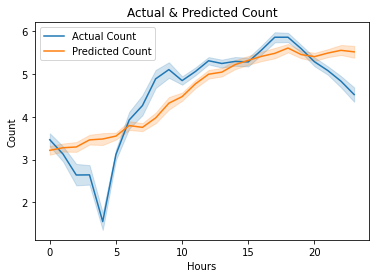

In [73]:
sns.lineplot(testingSet_out_rem.hr,testingSet_out_rem.cnt,palette = 'blue', label = 'Actual Count')
sns.lineplot(testingSet_out_rem.hr,yp_test_out_rem,palette = 'orange', label = 'Predicted Count')
plt.xlabel("Hours")
plt.ylabel("Count")
plt.title("Actual & Predicted Count")
plt.legend()
#plt.savefig('Actual_vs_Predicted_OLS.png', dpi=300, bbox_inches='tight')
plt.show()

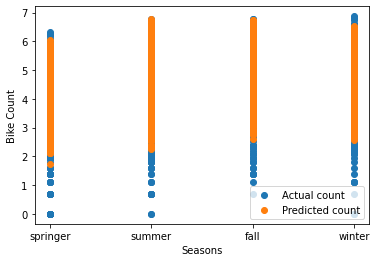

In [74]:
plt.scatter(testingSet_out_rem.season,testingSet_out_rem.cnt)
plt.scatter(testingSet_out_rem.season,yp_test_out_rem)
plt.legend(labels=[ "Actual count","Predicted count"])
plt.xticks(ticks=[1,2,3,4], labels=["springer","summer","fall","winter"])
plt.xlabel('Seasons')
plt.ylabel('Bike Count')
plt.show()

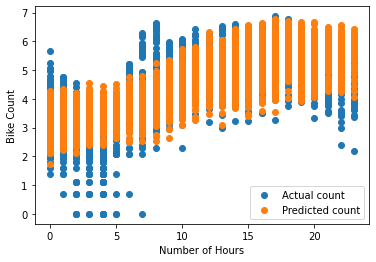

In [75]:
plt.scatter(testingSet_out_rem.hr,testingSet_out_rem.cnt)
plt.scatter(testingSet_out_rem.hr,yp_test_out_rem)
plt.legend(labels=[ "Actual count","Predicted count"])
plt.xlabel('Number of Hours')
plt.ylabel('Bike Count')
plt.show()

In [76]:
#sns.scatterplot(testingSet_out_rem.hr, testingSet_out_rem.cnt)
#sns.scatterplot(testingSet_out_rem.hr, yp_test_out_rem)

In [77]:
testingSet_out_rem.describe()

,mnth,hr,temp,hum,windspeed,cnt
count,2703.000000,2703.000000,2703.000000,2703.000000,2703.000000,2703.000000
mean,6.514243,12.289308,0.516064,0.598542,0.199864,4.740939
std,3.355630,6.465239,0.194986,0.192731,0.128499,1.260886
min,1.000000,0.000000,0.040000,0.160000,0.000000,0.000000
25%,4.000000,7.000000,0.340000,0.450000,0.104500,4.025352
50%,7.000000,13.000000,0.520000,0.590000,0.194000,5.068904
75%,9.000000,18.000000,0.660000,0.750000,0.283600,5.638355
max,12.000000,23.000000,0.960000,1.000000,0.850700,6.870053


In [78]:
testingSet_out_rem

,season,yr,mnth,hr,weathersit,temp,hum,windspeed,cnt
3358,2,0,5,20,1,0.66,0.74,0.0896,5.634790
15104,4,1,9,13,1,0.70,0.58,0.2239,5.828946
11177,2,1,4,22,1,0.68,0.44,0.3582,4.897840
9788,1,1,2,19,1,0.38,0.37,0.2239,5.641907
15409,4,1,10,6,2,0.38,0.82,0.2537,4.962845
...,...,...,...,...,...,...,...,...,...
9713,1,1,2,16,1,0.42,0.35,0.2985,5.583496
15153,4,1,9,14,2,0.70,0.54,0.2537,5.988961
2946,2,0,5,16,1,0.60,0.38,0.1940,5.834811
4167,3,0,6,13,2,0.72,0.58,0.2239,5.099866


In [79]:
yp_test_out_rem

3358     5.439108
15104    5.904388
11177    6.580917
9788     5.499103
15409    3.993993
           ...   
9713     5.340906
15153    6.064442
2946     5.439703
4167     4.923288
7230     5.210686
Length: 2703, dtype: float64

### Adjusted R_squared =  0.6459601287337615 
### Testing RMSE is = 0.7452312591544565
### Model Builded after removing influencial observation got better result

In [90]:
#Calculating VIF scores
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

y, X = dmatrices('cnt ~ season + hr + yr + temp + hum', data = trainingSet_out_rem, return_type="dataframe")

# For each Xi, calculate VIF
vif = [variance_inflation_factor(X.values, i) for i in range(1, X.shape[1])]
vif

[2.61769947850734,
 4.3560412869654135,
 1.88823668366086,
 1.0140856635260724,
 1.1216050080611617,
 2.9573592941202156,
 1.1461590096576697]

In [91]:
#Diagnosis of Model
#Checking Linearity Assusmption and Constant Variance of Residual Terms

#pred_val_out_rem = result_11_out_rem.fittedvalues.copy()
#true_val_out_rem = trainingSet_out_rem['cnt'].values.copy()
#residual_out_rem = true_val_out_rem - pred_val_out_rem
#fig, ax = plt.subplots(figsize=(6,3))
#_ = ax.scatter(pred_val_out_rem , residual_out_rem, s = 5)
#sns.regplot(pred_val_out_rem, residual_out_rem, order = 1, ci=None, line_kws={'color':'r'})
#plt.show()

In [92]:
#Checming Normality Condition
#import scipy as sp
#fig, ax = plt.subplots(figsize=(6,3))
#_, (__, ___, r) = sp.stats.probplot(residual_out_rem, plot=ax, fit=True)
#r**2

In [93]:

#import statsmodels.api as sm
#fig, ax = plt.subplots(figsize=(12,8))
#fig = sm.graphics.influence_plot(result_11_out_rem, ax=ax, criterion="cooks")

### Better Model using randomforest regressor

In [80]:
df_rem_obs_tot

,season,yr,mnth,hr,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,1,0.24,0.81,0.0000,2.772589
3,1,0,1,3,1,0.24,0.75,0.0000,2.564949
7,1,0,1,7,1,0.20,0.86,0.0000,1.098612
9,1,0,1,9,1,0.32,0.76,0.0000,2.639057
10,1,0,1,10,1,0.38,0.76,0.2537,3.583519
...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,2,0.26,0.60,0.1642,4.779123
17375,1,1,12,20,2,0.26,0.60,0.1642,4.488636
17376,1,1,12,21,1,0.26,0.60,0.1642,4.499810
17377,1,1,12,22,1,0.26,0.56,0.1343,4.110874


In [81]:
X = df_rem_obs_tot.drop(['cnt'], axis = 1).to_numpy()
y = df_rem_obs_tot.cnt
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.25 , random_state = 10)

In [82]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=200, random_state=0)
randomreg=regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [83]:
from sklearn import metrics


print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Squared Error: 0.26732651071294183
Root Mean Squared Error: 0.5170362760125655


In [84]:
print("R2 = ",metrics.r2_score(y_test, y_pred))
print("Adjusted R2 = ",1-(1-metrics.r2_score(y_test, y_pred))*((len(X_test)-1)/(len(X_test)-len(X_test[0])-1)))

R2 =  0.831790353774878
Adjusted R2 =  0.8312908448031626


### Final model with 
### RMSE = 0.51703
### Adjusted R2 = 0.83129

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Activation
from tensorflow.keras.optimizers import SGD
#from tensorflow.keras.optimizers import ADAM

In [102]:
y_train_reshape=y_train.values.reshape(len(y_train),1)
y_test_reshape=y_test.values.reshape(len(y_test),1)

In [104]:
y_test.shape

(2703,)

In [1]:
'''
First step is to initialize your model
Keras has two types of models 
    1. Sequential - easier to work with, suitable for most tasks
    2. Functional API - useful for defining complex models
'''
models = Sequential()

'''Then, define your model architecture'''

'''
Add a fully connected hidden layer with 128 nodes. 
When you add your first layer, Keras implicitly adds the input layer, 
so you need to specify the dimension of your inputs
'''
models.add(Dense(8, input_dim=8))
'''Specify your activation function for this layer'''
models.add(Activation('sigmoid'))
'''Add an output layer with 10 output nodes'''
models.add(Dense(4))
'''Specify your activation function for this layer'''
models.add(Activation('sigmoid'))
models.add(Dense(1))
'''Specify your activation function for this layer'''
models.add(Activation('linear'))

'''
Next, compile your model. This defines two critical features
    1. Optimizer - how your model learns
    2. Loss function - how your model defines the error between
       the correct output and its prediction
Here you can also specify the metrics you want to use to evaluate your model's performance
'''
#sgd = ADAM(learning_rate=0.001)
models.compile(optimizer="adam", loss='mse', metrics=['rmse'])

'''
Finally, train your model. 
To train, a model needs input data, and the corresponding correct outputs
You can also specify the batch size and number of training epochs
'''
models.fit(X_train, y_train_reshape, batch_size=32, epochs=15, verbose=2)

NameError: name 'Sequential' is not defined

In [141]:
# Print model information
models.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 8)                 72        
_________________________________________________________________
activation_33 (Activation)   (None, 8)                 0         
_________________________________________________________________
dense_34 (Dense)             (None, 4)                 36        
_________________________________________________________________
activation_34 (Activation)   (None, 4)                 0         
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 5         
_________________________________________________________________
activation_35 (Activation)   (None, 1)                 0         
Total params: 113
Trainable params: 113
Non-trainable params: 0
_______________________________________________________

In [109]:
def accuracy(X_test, y_test_reshape, model):
    result = model.predict(X_test)
    num_correct = np.argmax(result, axis=1)==np.argmax(y_test_reshape, axis=1)
    accuracy = 1.0 * np.sum(num_correct) / result.shape[0]
    print("Accuracy on data is: {}%".format(accuracy * 100))

In [142]:
accuracy(X_test, y_test_reshape, models)

Accuracy on data is: 100.0%


In [143]:
models.predict(X_test)

array([[5.292369 ],
       [5.2376757],
       [5.292891 ],
       ...,
       [5.2856083],
       [5.151403 ],
       [5.293741 ]], dtype=float32)

In [112]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.constraints import maxnorm
from tensorflow.keras.regularizers import l2, l1

In [120]:
'''
First step is to initialize your model
Keras has two types of models 
    1. Sequential - easier to work with, suitable for most tasks
    2. Functional API - useful for defining complex models
'''
model1 = Sequential()

'''Then, define your model architecture'''

'''
Add a fully connected hidden layer with 128 nodes. 
When you add your first layer, Keras implicitly adds the input layer, 
so you need to specify the dimension of your inputs
'''
model1.add(Dense(8, input_dim=8, kernel_regularizer=l2(0.1)))
'''Specify your activation function for this layer'''
model1.add(Activation('sigmoid'))
'''Add an output layer with 10 output nodes'''
model1.add(Dense(4))
'''Specify your activation function for this layer'''
model1.add(Activation('sigmoid'))
model1.add(Dense(1))
'''Specify your activation function for this layer'''
model1.add(Activation('linear'))

'''
Next, compile your model. This defines two critical features
    1. Optimizer - how your model learns
    2. Loss function - how your model defines the error between
       the correct output and its prediction
Here you can also specify the metrics you want to use to evaluate your model's performance
'''
#sgd = SGD(learning_rate=0.001)
model1.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

'''
Finally, train your model. 
To train, a model needs input data, and the corresponding correct outputs
You can also specify the batch size and number of training epochs
'''
model1.fit(X_train, y_train_reshape, batch_size=32, epochs=10, verbose=2)

Epoch 1/10
254/254 - 1s - loss: 23.1274 - accuracy: 0.0023
Epoch 2/10
254/254 - 0s - loss: 14.7721 - accuracy: 0.0000e+00
Epoch 3/10
254/254 - 0s - loss: 11.2723 - accuracy: 0.0000e+00
Epoch 4/10
254/254 - 0s - loss: 8.1340 - accuracy: 0.0000e+00
Epoch 5/10
254/254 - 0s - loss: 4.2945 - accuracy: 0.0000e+00
Epoch 6/10
254/254 - 0s - loss: 2.7027 - accuracy: 0.0000e+00
Epoch 7/10
254/254 - 0s - loss: 2.0268 - accuracy: 0.0000e+00
Epoch 8/10
254/254 - 0s - loss: 1.7119 - accuracy: 0.0000e+00
Epoch 9/10
254/254 - 0s - loss: 1.4682 - accuracy: 0.0000e+00
Epoch 10/10
254/254 - 0s - loss: 1.2609 - accuracy: 0.0000e+00


In [121]:
accuracy(X_test, y_test_reshape, model1)

Accuracy on data is: 100.0%


In [123]:
'''
First step is to initialize your model
Keras has two types of models 
    1. Sequential - easier to work with, suitable for most tasks
    2. Functional API - useful for defining complex models
'''
model2 = Sequential()

'''Then, define your model architecture'''

'''
Add a fully connected hidden layer with 128 nodes. 
When you add your first layer, Keras implicitly adds the input layer, 
so you need to specify the dimension of your inputs
'''
model2.add(Dense(8, input_dim=8, kernel_regularizer=l1(0.1)))
'''Specify your activation function for this layer'''
model2.add(Activation('sigmoid'))
'''Add an output layer with 10 output nodes'''
model2.add(Dense(4))
'''Specify your activation function for this layer'''
model2.add(Activation('sigmoid'))
model2.add(Dense(1))
'''Specify your activation function for this layer'''
model2.add(Activation('linear'))

'''
Next, compile your model. This defines two critical features
    1. Optimizer - how your model learns
    2. Loss function - how your model defines the error between
       the correct output and its prediction
Here you can also specify the metrics you want to use to evaluate your model's performance
'''
#sgd = SGD(learning_rate=0.001)
model2.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

'''
Finally, train your model. 
To train, a model needs input data, and the corresponding correct outputs
You can also specify the batch size and number of training epochs
'''
model2.fit(X_train, y_train_reshape, batch_size=32, epochs=10, verbose=2)

Epoch 1/10
254/254 - 3s - loss: 20.7338 - accuracy: 0.0019
Epoch 2/10
254/254 - 0s - loss: 12.1487 - accuracy: 0.0000e+00
Epoch 3/10
254/254 - 0s - loss: 7.7846 - accuracy: 0.0000e+00
Epoch 4/10
254/254 - 0s - loss: 5.1996 - accuracy: 0.0000e+00
Epoch 5/10
254/254 - 0s - loss: 3.5792 - accuracy: 0.0000e+00
Epoch 6/10
254/254 - 0s - loss: 2.5873 - accuracy: 0.0000e+00
Epoch 7/10
254/254 - 0s - loss: 1.9419 - accuracy: 0.0000e+00
Epoch 8/10
254/254 - 0s - loss: 1.6400 - accuracy: 0.0000e+00
Epoch 9/10
254/254 - 0s - loss: 1.5817 - accuracy: 0.0000e+00
Epoch 10/10
254/254 - 0s - loss: 1.5619 - accuracy: 0.0000e+00


In [124]:
accuracy(X_test, y_test_reshape, model2)

Accuracy on data is: 100.0%


In [129]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [151]:
def create_model(lyrs=[8], act='linear', opt='Adam', dr=0.0):
    
    # set random seed for reproducibility
    seed(42)
    set_random_seed(42)
    
    model = Sequential()
    
    # create first hidden layer
    model.add(Dense(lyrs[0], input_dim=X_train.shape[1], activation=act))
    
    # create additional hidden layers
    for i in range(1,len(lyrs)):
        model.add(Dense(lyrs[i], activation=act))
    
    # add dropout, default is none
    model.add(Dropout(dr))
    
    # create output layer
    model.add(Dense(1, activation='sigmoid'))  # output layer
    
    model.compile(loss='mse', optimizer=opt, metrics=['accuracy'])
    
    return model

In [154]:
model = create_model()
#print(model.summary())

TypeError: 'int' object is not callable

In [153]:
# train model on full train set, with 80/20 CV split
training = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)
val_acc = np.mean(training.history['val_acc'])
print("\n%s: %.2f%%" % ('val_acc', val_acc*100))

KeyError: 'val_acc'

In [144]:
# create model
#modelclass = KerasRegressor(build_fn=model, verbose=0)

# define the grid search parameters
batch_size = [16, 32, 64]
epochs = [50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)

# search the grid
grid = GridSearchCV(estimator=models, 
                    param_grid=param_grid,
                    cv=3,
                    verbose=2,n_jobs=-1)  # include n_jobs=-1 if you are using CPU

grid_result = grid.fit(X_train, y_train_reshape)

TypeError: If no scoring is specified, the estimator passed should have a 'score' method. The estimator <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000017E1992E370> does not.

In [99]:
#Checming Normality Condition
#import scipy as sp
#fig, ax = plt.subplots(figsize=(6,3))
#_, (__, ___, r) = sp.stats.probplot(residual_out_rem, plot=ax, fit=True)
#r**2

In [100]:
X_test.shape

(2703, 8)

In [101]:
np.transpose(X_test[1].reshape(-1,1)).shape

(1, 8)

In [102]:
y_pred_value1 = regressor.predict(np.transpose(X_test[1].reshape(-1,1)))
y_pred_value1

array([5.95085814])

In [103]:
X_test

array([[ 2.    ,  0.    ,  5.    , ...,  0.66  ,  0.74  ,  0.0896],
       [ 4.    ,  1.    ,  9.    , ...,  0.7   ,  0.58  ,  0.2239],
       [ 2.    ,  1.    ,  4.    , ...,  0.68  ,  0.44  ,  0.3582],
       ...,
       [ 2.    ,  0.    ,  5.    , ...,  0.6   ,  0.38  ,  0.194 ],
       [ 3.    ,  0.    ,  6.    , ...,  0.72  ,  0.58  ,  0.2239],
       [ 4.    ,  0.    , 11.    , ...,  0.38  ,  0.71  ,  0.1343]])

In [104]:
randomreg.score(X_train,y_train)

0.9759630024219796

In [105]:
randomreg.score(X_test,y_test)

0.831790353774878

In [106]:
T_X_test=np.transpose(X_test)

In [107]:
T_X_test[4]

array([1., 1., 1., ..., 1., 2., 1.])

In [108]:
X_test[0]

array([ 2.    ,  0.    ,  5.    , 20.    ,  1.    ,  0.66  ,  0.74  ,
        0.0896])

In [109]:
X_test.shape,y_test.shape

((2703, 8), (2703,))

C:\Users\mahesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mahesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


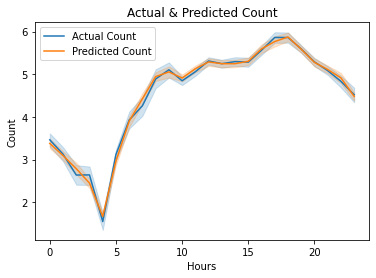

In [110]:
sns.lineplot(T_X_test[3],y_test,palette = 'blue', label = 'Actual Count')
sns.lineplot(T_X_test[3],y_pred,palette = 'orange', label = 'Predicted Count')
plt.xlabel("Hours")
plt.ylabel("Count")
plt.title("Actual & Predicted Count")
plt.legend()
#plt.savefig('Actual_vs_Predicted_RFR.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\mahesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mahesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


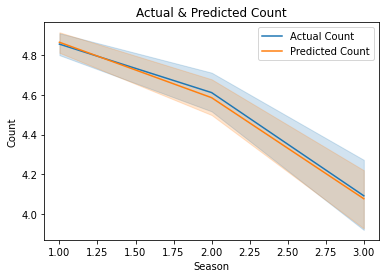

In [111]:
sns.lineplot(T_X_test[4],y_test,palette = 'blue', label = 'Actual Count')
sns.lineplot(T_X_test[4],y_pred,palette = 'orange', label = 'Predicted Count')
plt.xlabel("Season")
plt.ylabel("Count")
plt.title("Actual & Predicted Count")
plt.legend()
plt.show()

In [112]:
np.array(y_test).reshape(-1, 1).shape,y_pred.reshape(-1, 1).shape

((2703, 1), (2703, 1))

In [113]:
y_pred

array([5.4916976 , 5.95085814, 5.34081006, ..., 5.76049993, 5.22209804,
       4.89511982])

In [114]:
y_test

3358     5.634790
15104    5.828946
11177    4.897840
9788     5.641907
15409    4.962845
           ...   
9713     5.583496
15153    5.988961
2946     5.834811
4167     5.099866
7230     5.123964
Name: cnt, Length: 2703, dtype: float64

In [115]:
from sklearn.model_selection import GridSearchCV

In [116]:
param_grid = { 'n_estimators': [10,100, 200, 300] }
clf = GridSearchCV(randomreg,  param_grid, n_jobs=-1, cv=5)

In [117]:
clf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(n_estimators=200, random_state=0),
             n_jobs=-1, param_grid={'n_estimators': [10, 100, 200, 300]})

In [118]:
clf.best_score_

0.8281927205386592

In [119]:
clf.best_estimator_

RandomForestRegressor(n_estimators=300, random_state=0)

In [120]:
df_rem_obs_tot.drop(['cnt'], axis = 1)

,season,yr,mnth,hr,weathersit,temp,hum,windspeed
0,1,0,1,0,1,0.24,0.81,0.0000
3,1,0,1,3,1,0.24,0.75,0.0000
7,1,0,1,7,1,0.20,0.86,0.0000
9,1,0,1,9,1,0.32,0.76,0.0000
10,1,0,1,10,1,0.38,0.76,0.2537
...,...,...,...,...,...,...,...,...
17374,1,1,12,19,2,0.26,0.60,0.1642
17375,1,1,12,20,2,0.26,0.60,0.1642
17376,1,1,12,21,1,0.26,0.60,0.1642
17377,1,1,12,22,1,0.26,0.56,0.1343


In [121]:
score = randomreg.score(X_test,y_test)
score

0.831790353774878

In [122]:
import tkinter as tk
from tkinter import *

In [123]:
# tkinter GUI
import tkinter as tk
from tkinter import *

root= tk.Tk()

canvas1 = tk.Canvas(root, width = 500, height = 500)
canvas1.pack()

# with sklearn
Prediction_Accuracy = ('Prediction_Accuracy Percetange: ', score*100)
label_Intercept = tk.Label(root, text=Prediction_Accuracy, justify = 'center').place(x=100, y=400)
canvas1.create_window(260, 240, window=label_Intercept)


# New_Interest_Rate label and input box
label1 = tk.Label(root, text='season (1: springer,\n2: summer, 3: fall, 4: winter) :').place(x=50, y=50)
canvas1.create_window(100, 100, window=label1)

entry1 = tk.Entry (root)

canvas1.create_window(270, 100, window=entry1)


label2 = tk.Label(root, text='year (0: 2011, 1:2012):').place(x=50, y=80)
canvas1.create_window(100, 100, window=label2)

entry2 = tk.Entry (root)

canvas1.create_window(270, 100, window=entry2)

label3 = tk.Label(root, text='month (1 to 12) :').place(x=50, y=110)
canvas1.create_window(100, 100, window=label3)

entry3 = tk.Entry (root)

canvas1.create_window(270, 100, window=entry3)

label4 = tk.Label(root, text='hour (0 to 23) :').place(x=50, y=140)
canvas1.create_window(100, 100, window=label4)

entry4 = tk.Entry (root)

canvas1.create_window(270, 100, window=entry4)

label5 = tk.Label(root, text='weathersit (1: clear, 2:mist+cloud,\n 3: light snow, 4: heavy rain):').place(x=50, y=170)
canvas1.create_window(100, 100, window=label5)

entry5 = tk.Entry (root)

canvas1.create_window(350, 100, window=entry5)

label6 = tk.Label(root, text='Normalized temperature :').place(x=50, y=200)
canvas1.create_window(100, 100, window=label6)

entry6 = tk.Entry (root)

canvas1.create_window(270, 100, window=entry6)

label7 = tk.Label(root, text='Normalized humidity :').place(x=50, y=230)
canvas1.create_window(100, 100, window=label7)

entry7 = tk.Entry (root)

canvas1.create_window(270, 100, window=entry7)

label8 = tk.Label(root, text='Normalized wind speed :').place(x=50, y=260)
canvas1.create_window(100, 100, window=label8)

entry8 = tk.Entry (root)

canvas1.create_window(270, 100, window=entry8)

entry1.place(x=210, y=50)# create 1st entry box
entry2.place(x=210, y=80)# create 1st entry box
entry3.place(x=210, y=110)# create 1st entry box
entry4.place(x=210, y=140)# create 1st entry box
entry5.place(x=210, y=170)# create 1st entry box
entry6.place(x=210, y=200)# create 1st entry box
entry7.place(x=210, y=230)# create 1st entry box
entry8.place(x=210, y=260)# create 1st entry box




def values1():
    global adj_close,predictions #our 1st input variable
    #total_values =  (entry1.get())
    #print(total_values)
    #values = total_values.split(",")
    #print(values)
    #print(float(values[0]))
    values =  ([entry1.get(),entry2.get(),entry3.get(),entry4.get(),entry5.get(),entry6.get(),entry7.get(),entry8.get()])
    predictions =regressor.predict([[float(values[0]),float(values[1]),float(values[2]),
                         float(values[3]),float(values[4]),float(values[5]),
                         float(values[6]),float(values[7])]])
   
    Prediction_result  = ('Predicted Count: ', predictions  )
    label_Prediction = tk.Label(root, text= Prediction_result, bg='orange').place(x=150, y=360)
    canvas1.create_window(260, 280, window=label_Prediction)

button1 = tk.Button (root, text='Predict Count by Entering data',command=values1, bg='orange').place(x=150, y=325) # button to call the 'values' command above
canvas1.create_window(270, 190, window=button1)



root.mainloop()

